* Project Team ID - PTID-CDS-SEP-25-3134
* Project ID - PRCP-1004-Fifa20

**Business Case** :
 How can we group and understand thousands of football players based on their skills, so teams, analysts, or developers can make better decisions?

Clubs: Which type of player fits our team’s playstyle?

Scouts: Which players are undervalued but have high potential?

EA Sports: How can we categorize players to balance gameplay difficulty?

# **Domain Analysis**

This dataset represents data from FIFA 20, a football simulation game by EA Sports, providing extensive player information such as personal attributes, skill ratings, financial value, and positional performance. The goal is to analyze, cluster, and rank players based on football performance indicators.
Player Identification: sofifa_id, player_url, short_name, long_name

Demographics: age, dob, height_cm, weight_kg, nationality

Career Info: club, joined, contract_valid_until, loaned_from

Performance Attributes:

* Overall / Potential: general and maximum expected performance
* Attacking: attacking_crossing, attacking_finishing, heading_accuracy
* Skill: dribbling, ball_control, curve
* Movement: acceleration, sprint_speed, agility, reactions
* Power: strength, stamina, jumping
* Mentality: vision, composure, positioning
* Defending / Goalkeeping: standing_tackle, sliding_tackle, gk_diving, etc.
* Financial Attributes: value_eur, wage_eur, release_clause_eur

Positional Ratings: e.g., st, cf, lw, rw, cb, gk

Metadata: preferred_foot, work_rate, body_type, real_face

4 Clusters according to our dataset
* Cluster 0 (Outfielders): high pace, shooting, dribbling,high passing, vision, ball control,high defending, strength, interceptions
* Cluster 1 (Goalkeepers): specialized GK attributes

## Basic **Checks**

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv('players_20.csv')

In [71]:
pd.set_option("display.max_columns",None)

In [72]:
df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [73]:
Top_countries_count = df['nationality'].value_counts().head(10)

# Display as a table
print("Top 10 Countries Producing the Most Players:\n")
display(Top_countries_count.to_frame().rename(columns={'nationality': 'Player_Count'}))

Top 10 Countries Producing the Most Players:



count
nationality       
England       1667
Germany       1216
Spain         1035
France         984
Argentina      886
Brazil         824
Italy          732
Colombia       591
Japan          453
Netherlands    416

## *EDA*
* Univariate Analysis

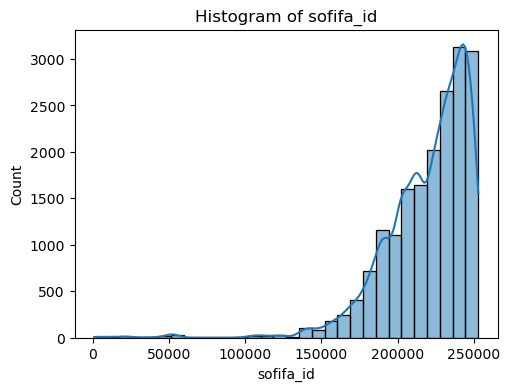

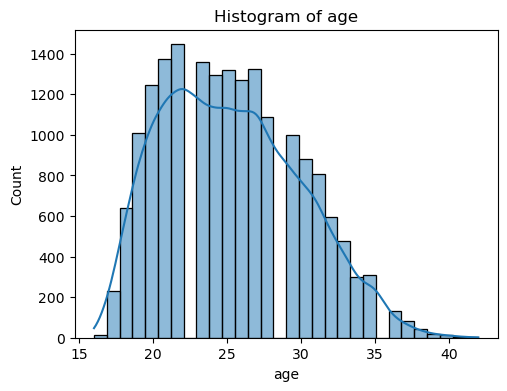

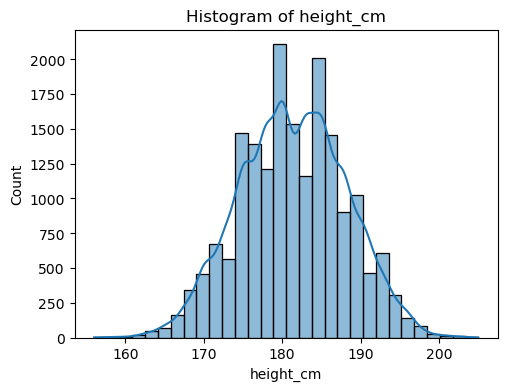

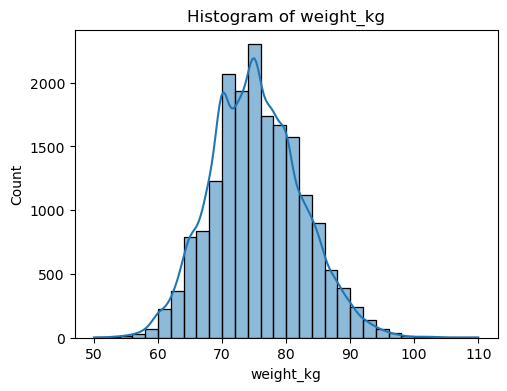

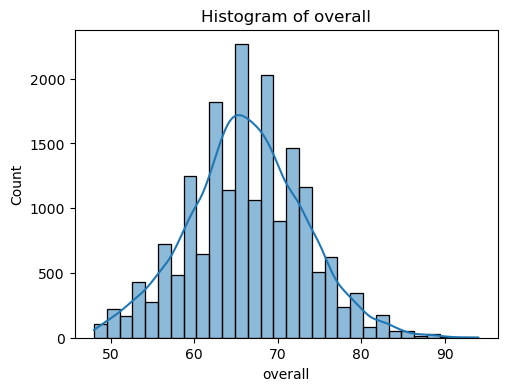

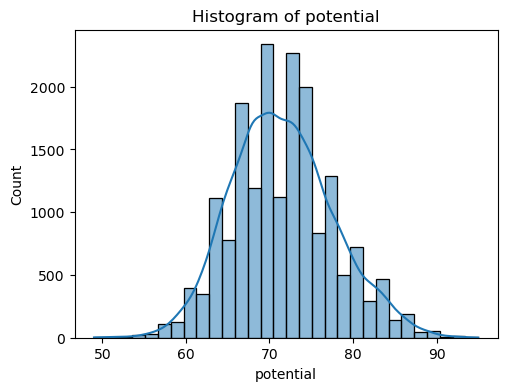

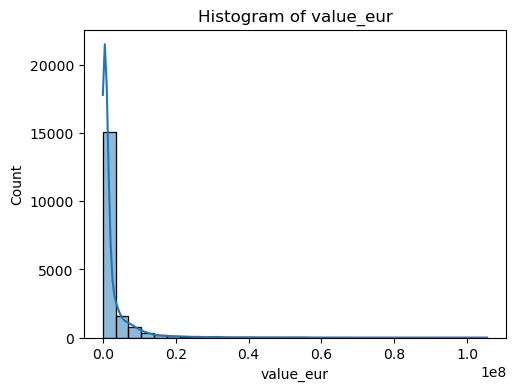

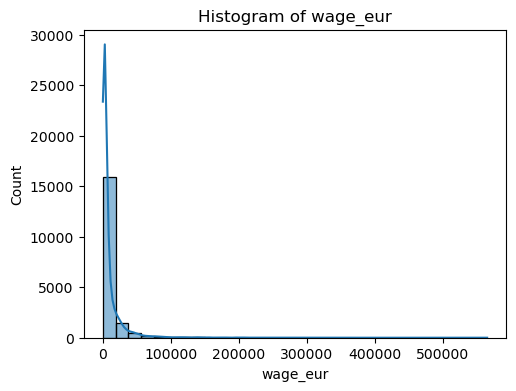

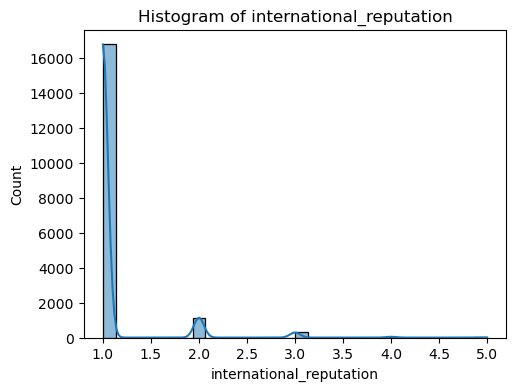

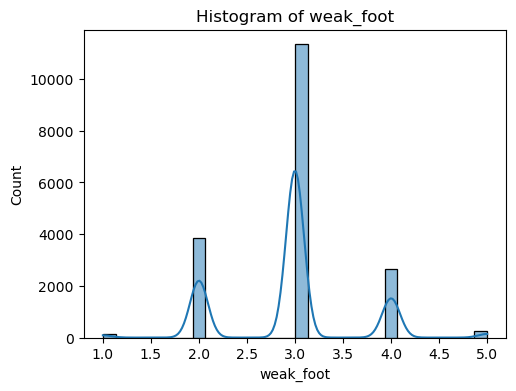

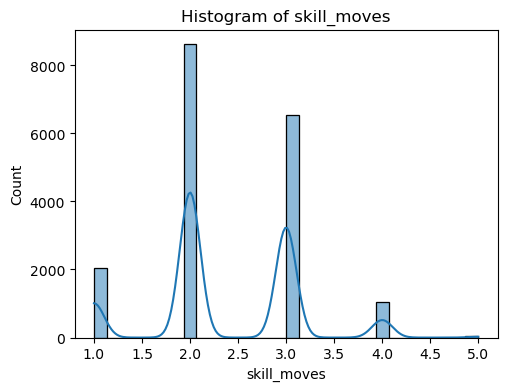

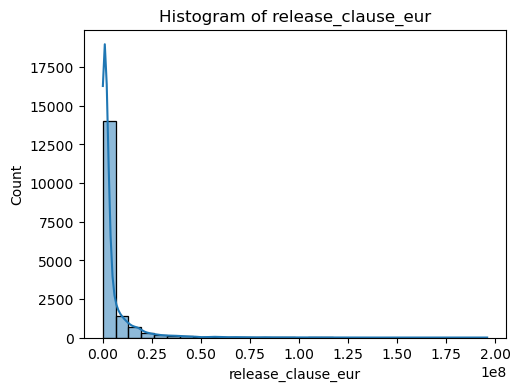

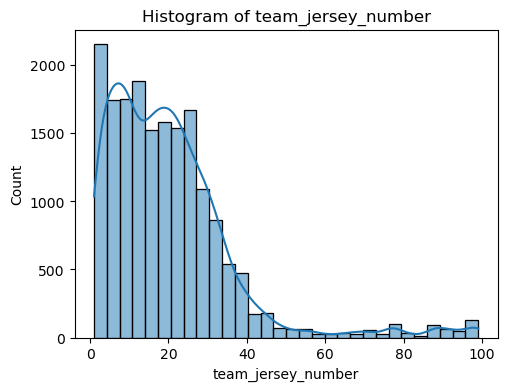

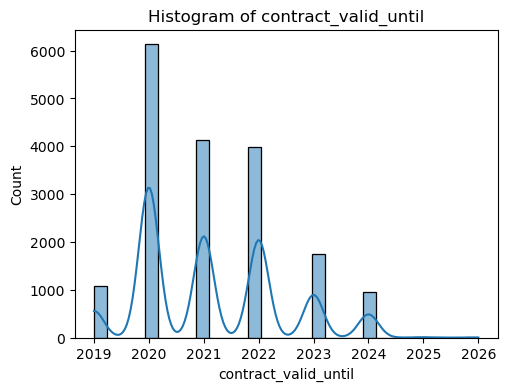

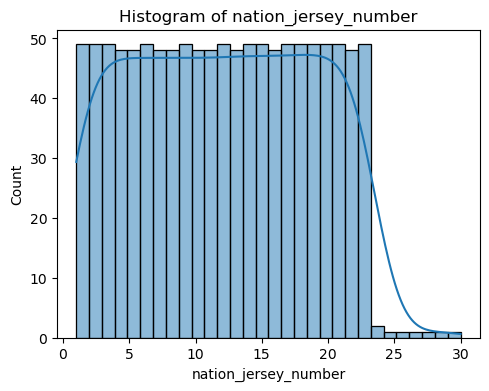

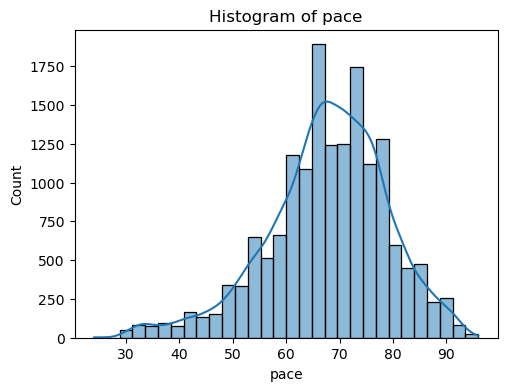

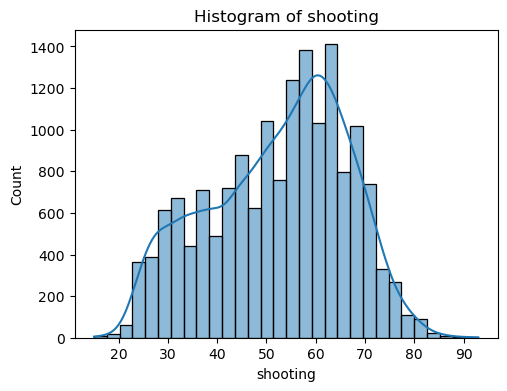

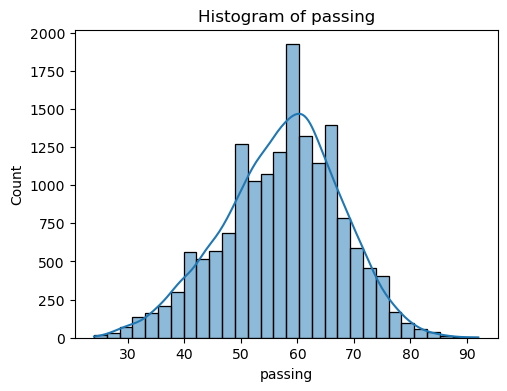

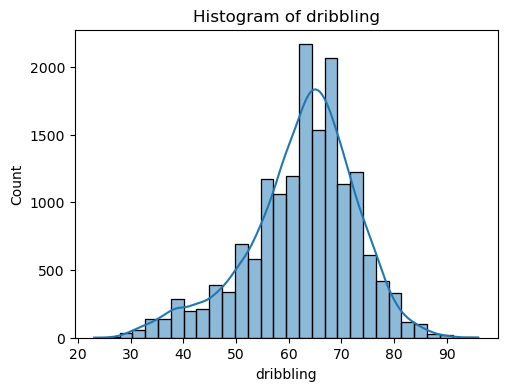

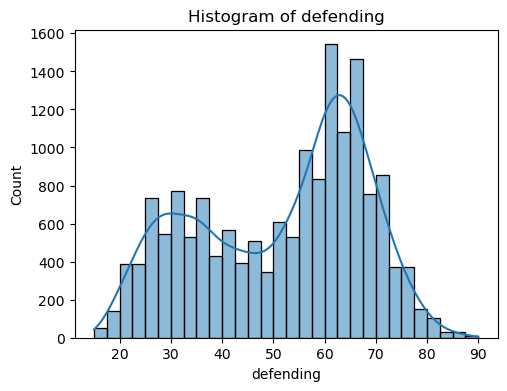

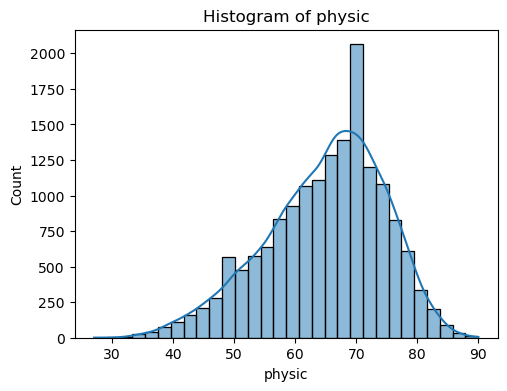

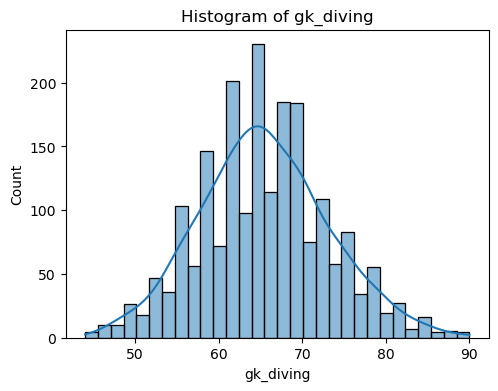

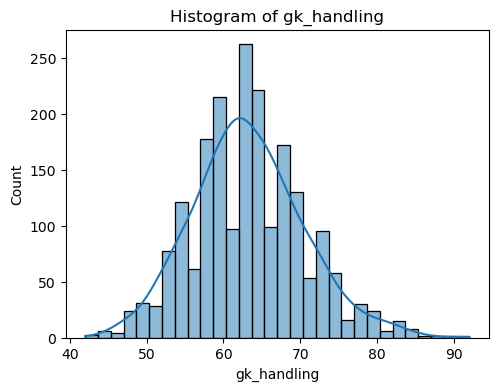

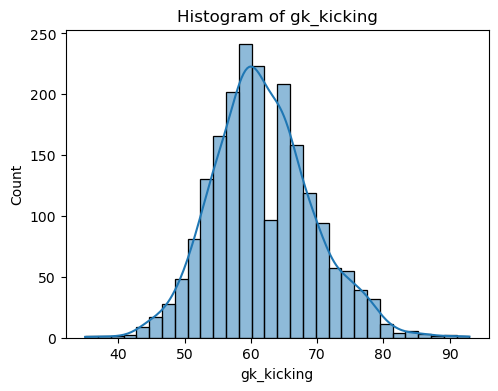

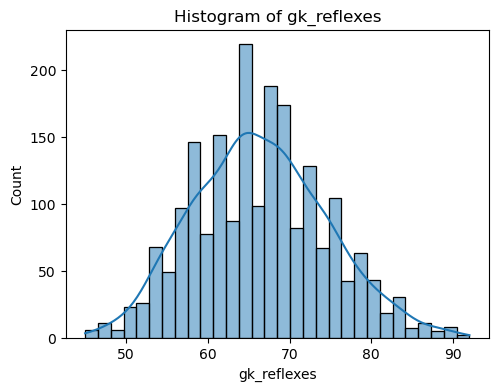

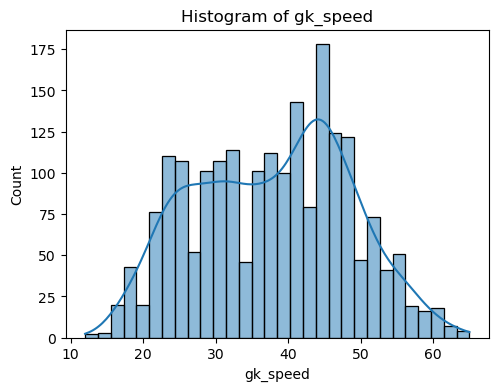

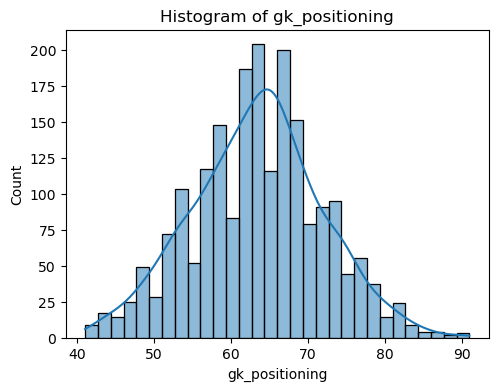

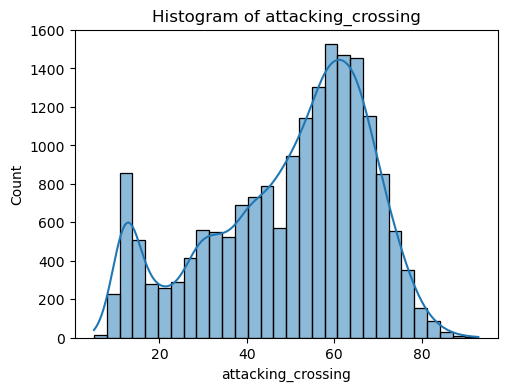

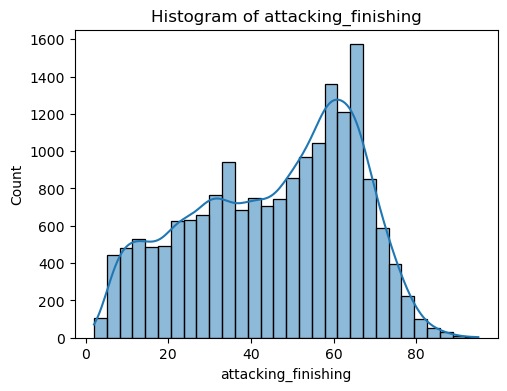

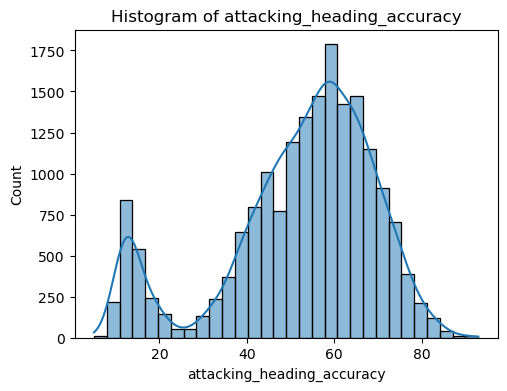

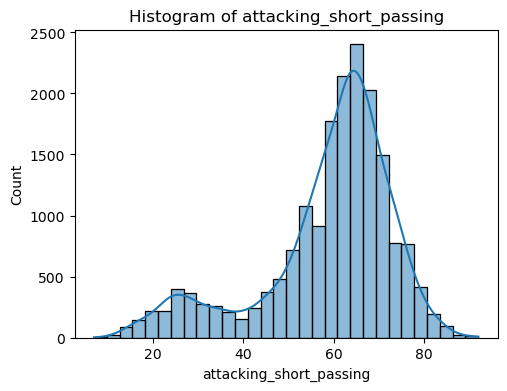

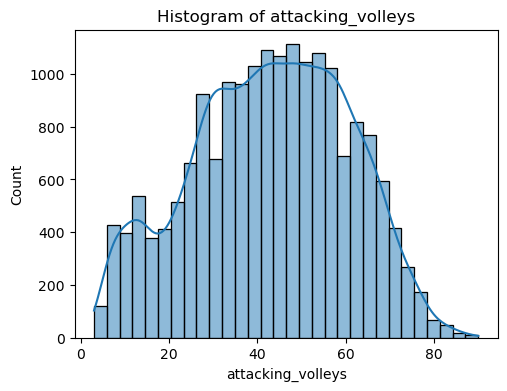

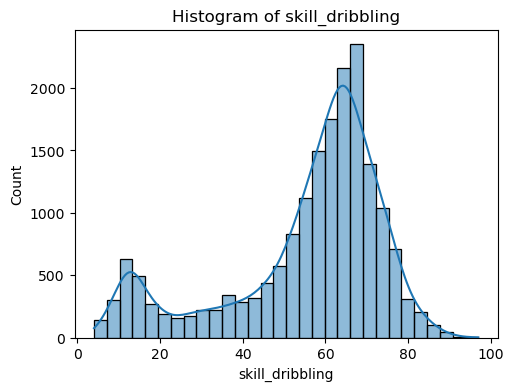

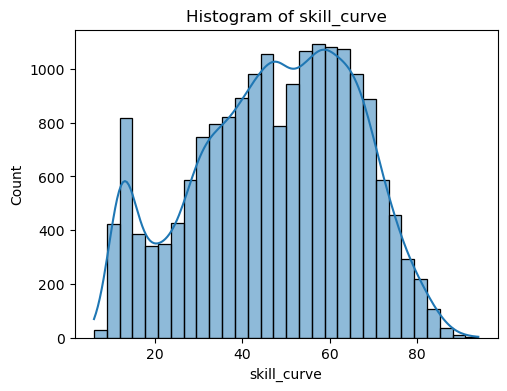

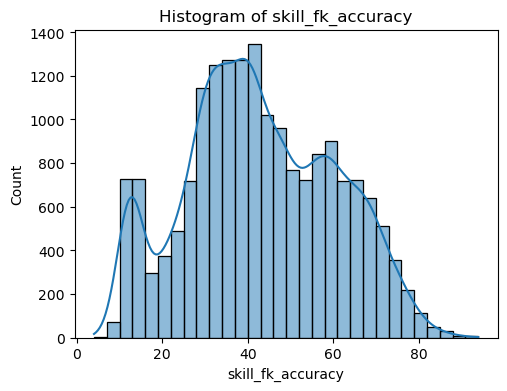

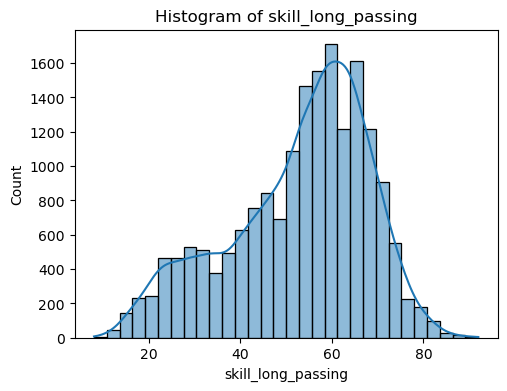

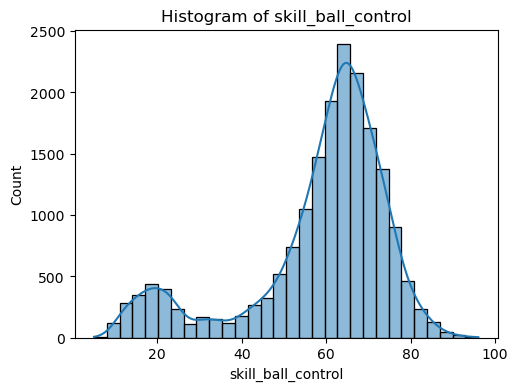

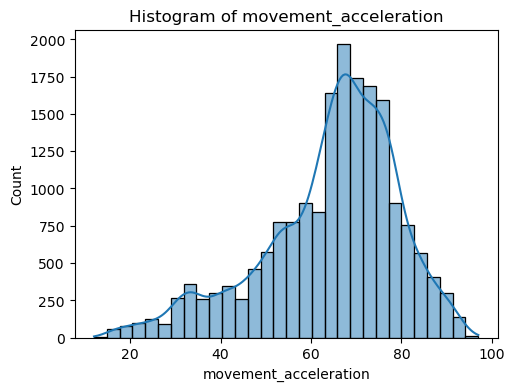

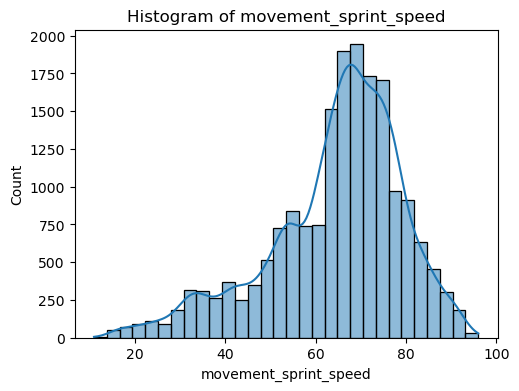

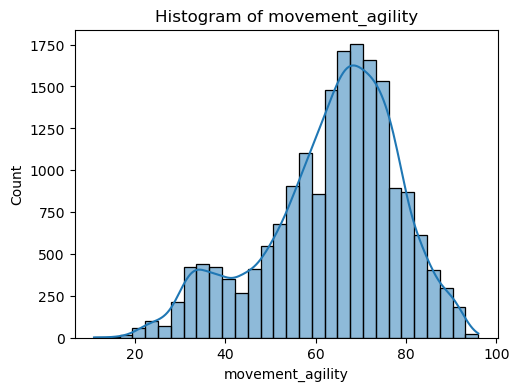

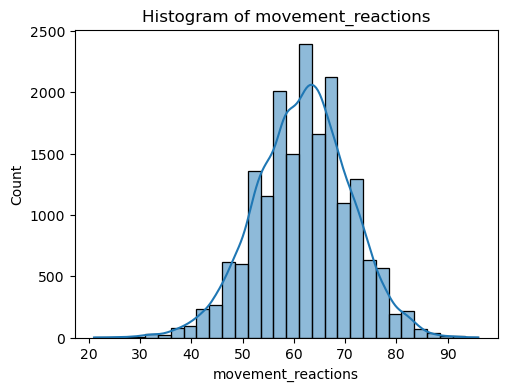

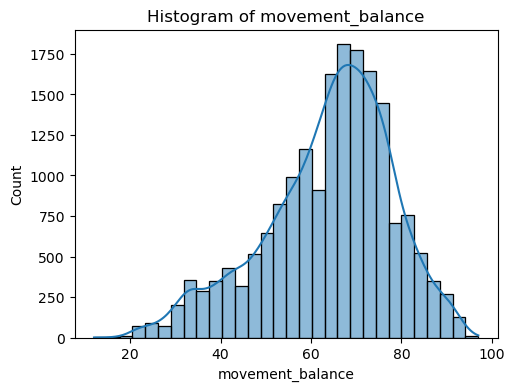

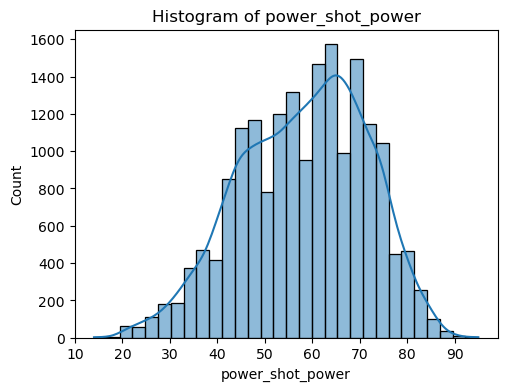

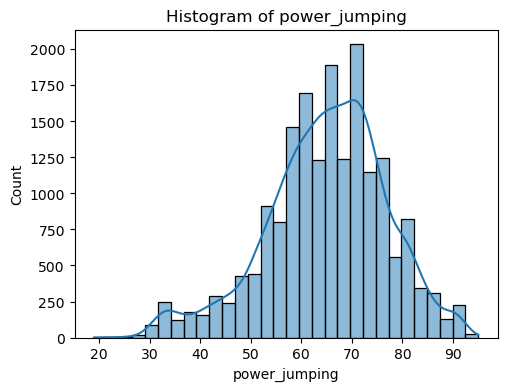

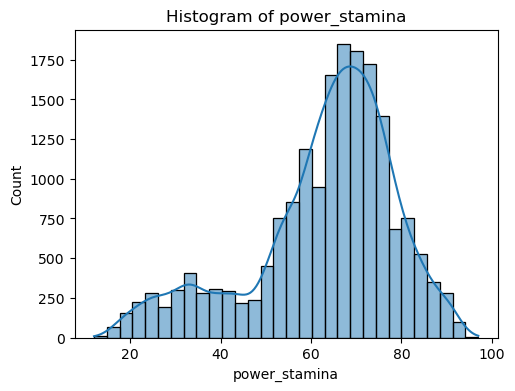

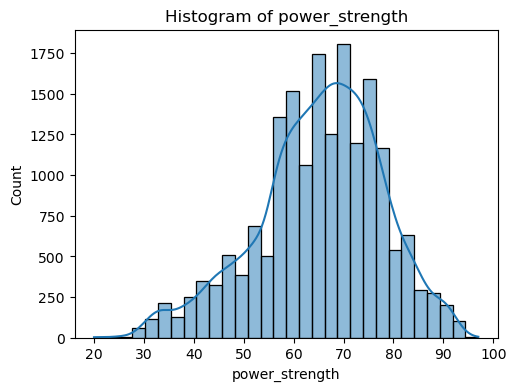

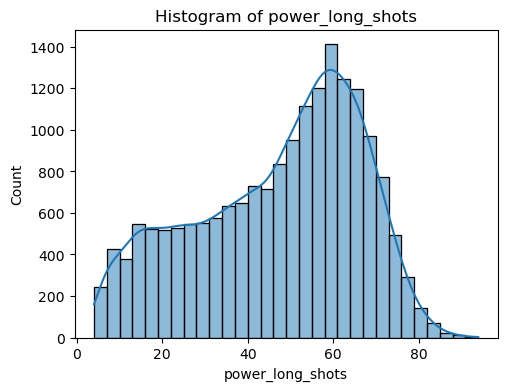

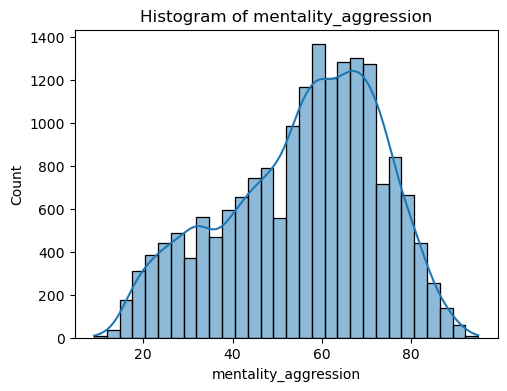

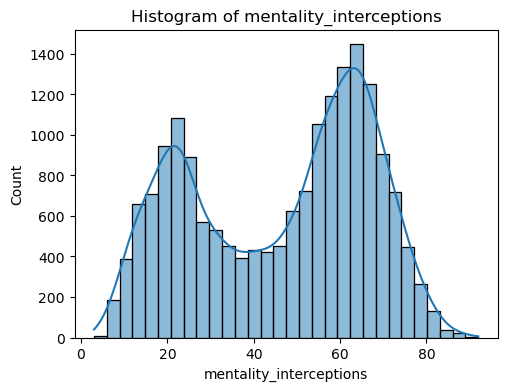

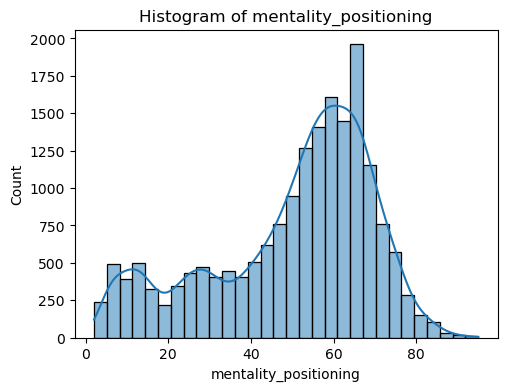

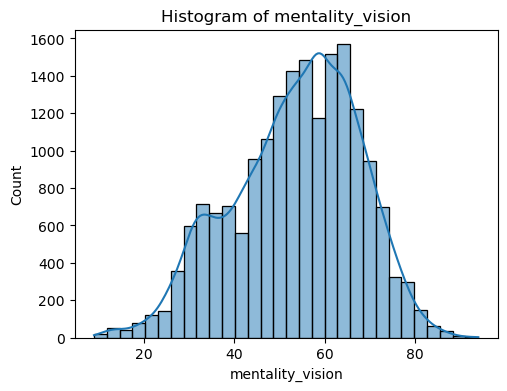

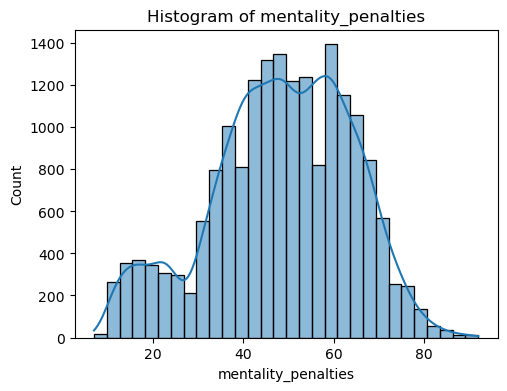

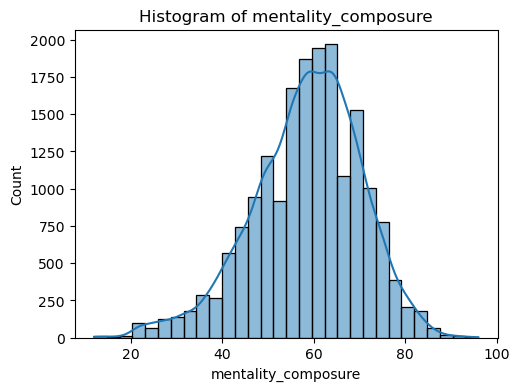

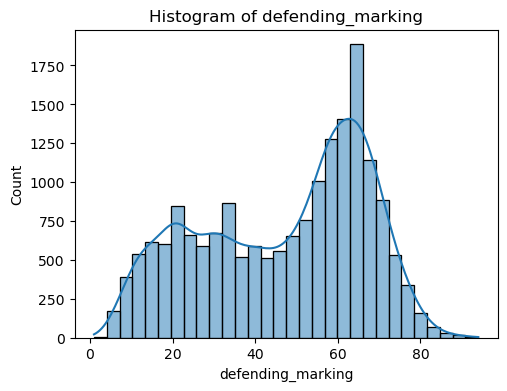

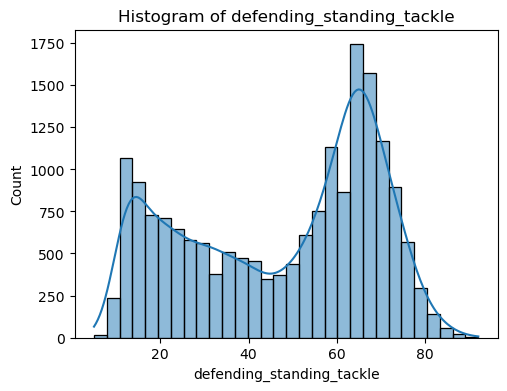

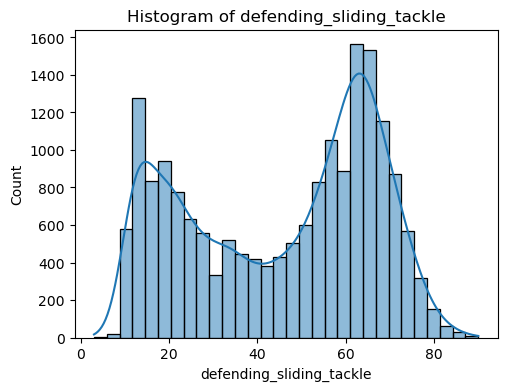

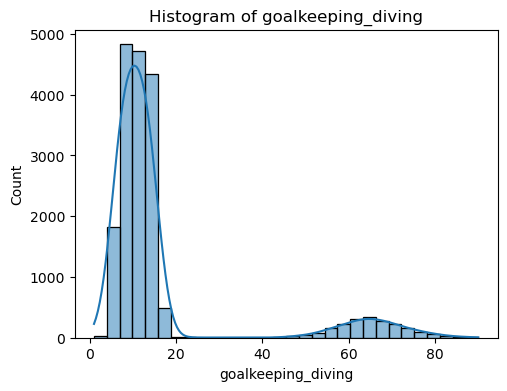

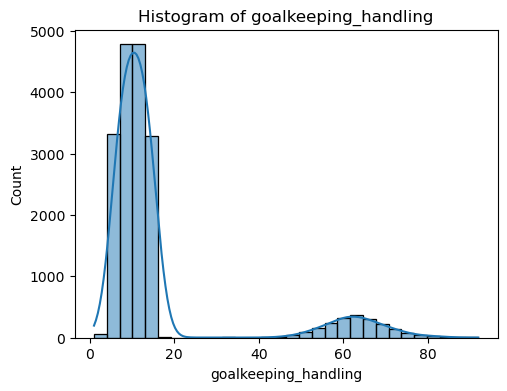

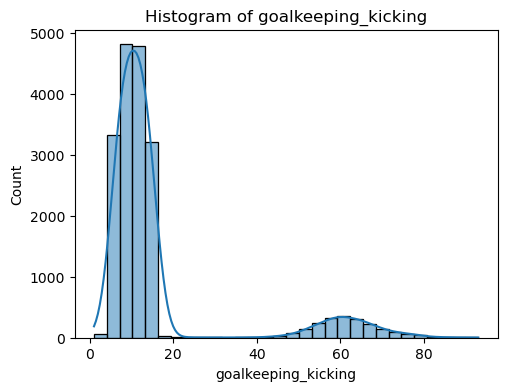

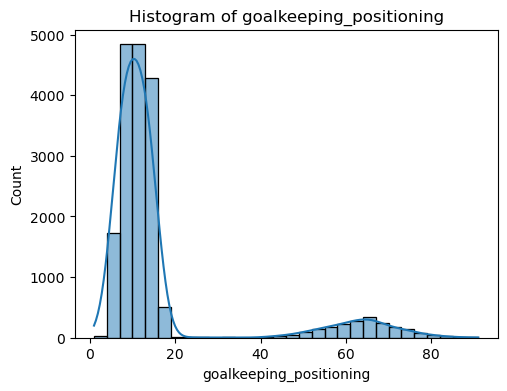

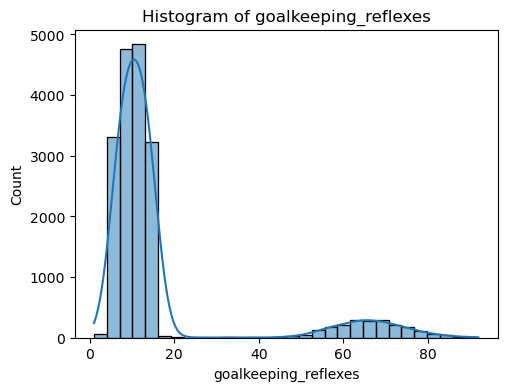

In [74]:
columns = df.select_dtypes(include=['int64','float64']).columns
for col in columns:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(f"Histogram of {col}")

* Bivariate Analysis

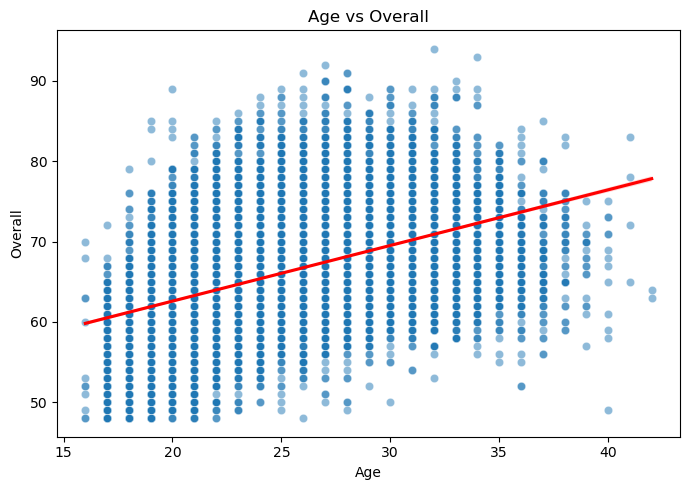

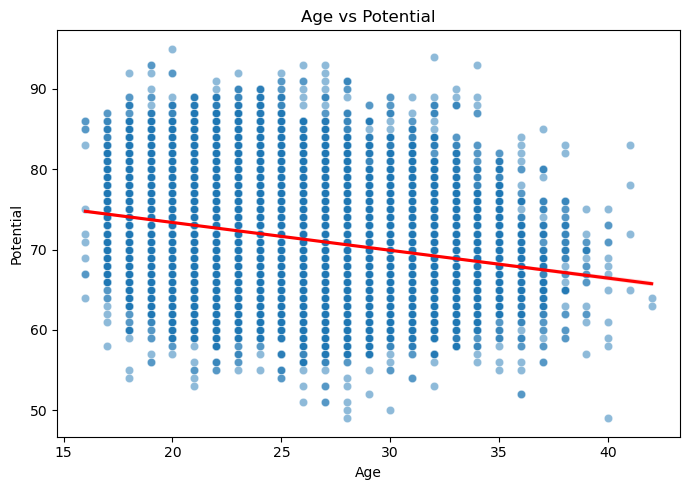

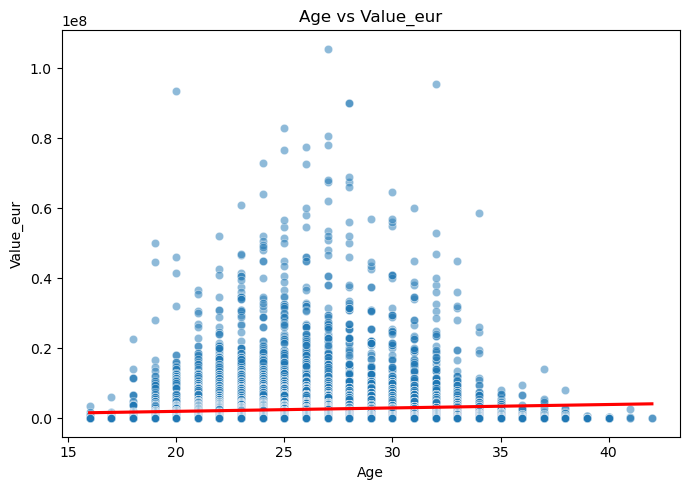

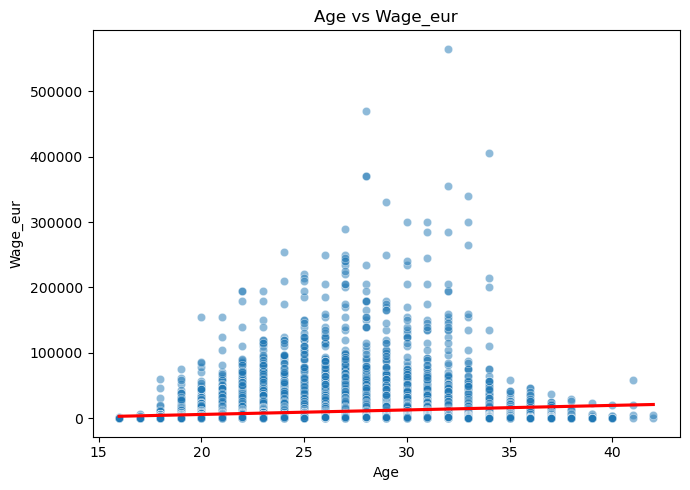

In [75]:
columns = ['overall', 'potential', 'value_eur', 'wage_eur']
for col in columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='age', y=col, data=df, alpha=0.5)
    sns.regplot(x='age', y=col, data=df, scatter=False, color='red')  # add trend line
    plt.title(f"Age vs {col.capitalize()}")
    plt.xlabel("Age")
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()

<Axes: xlabel='overall', ylabel='value_eur'>

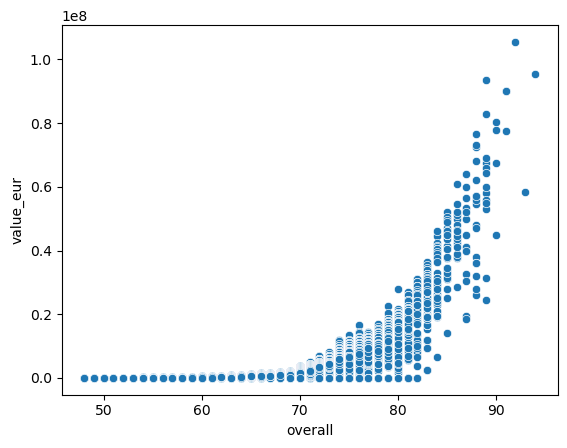

In [76]:
sns.scatterplot(x='overall',y='value_eur', data=df)

<Axes: xlabel='overall', ylabel='wage_eur'>

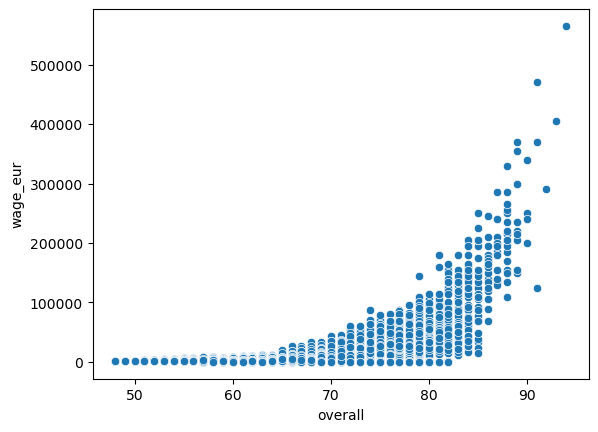

In [77]:
sns.scatterplot(x='overall',y='wage_eur',data=df)

<Axes: xlabel='potential', ylabel='value_eur'>

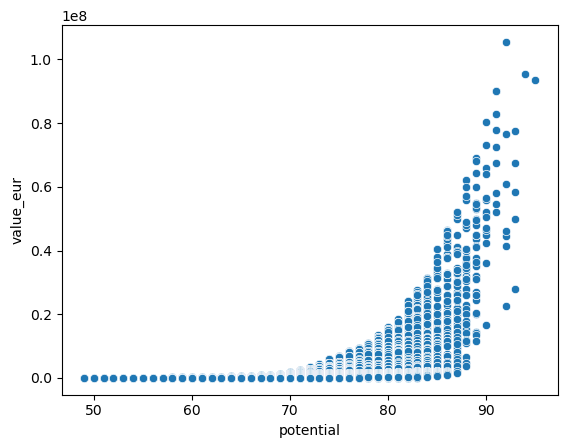

In [78]:
sns.scatterplot(x='potential',y='value_eur',data=df)

<Axes: xlabel='potential', ylabel='wage_eur'>

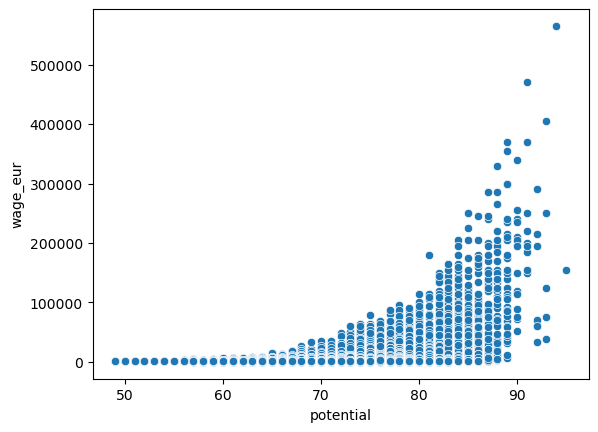

In [79]:
sns.scatterplot(x='potential',y='wage_eur',data=df)

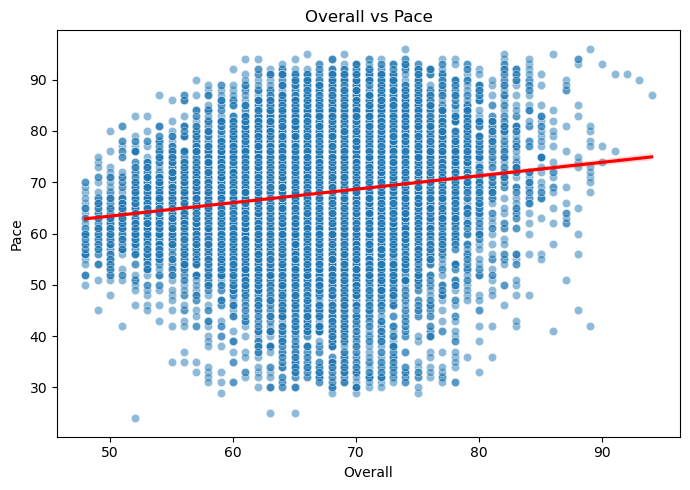

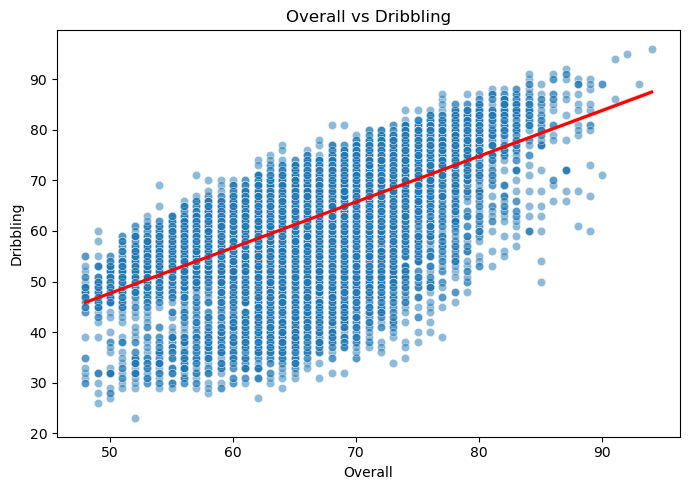

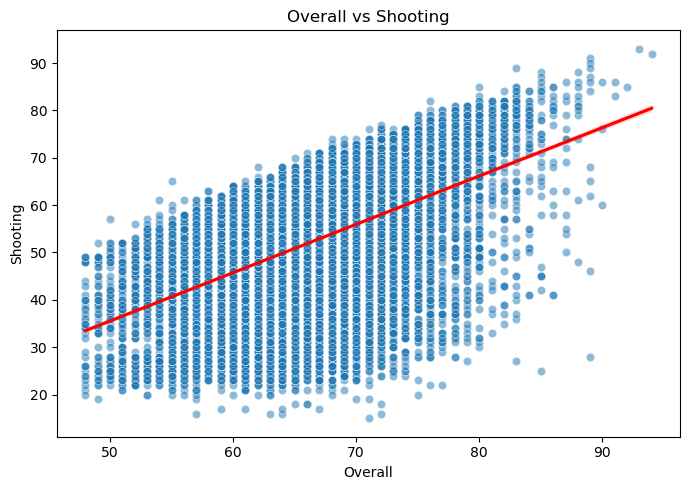

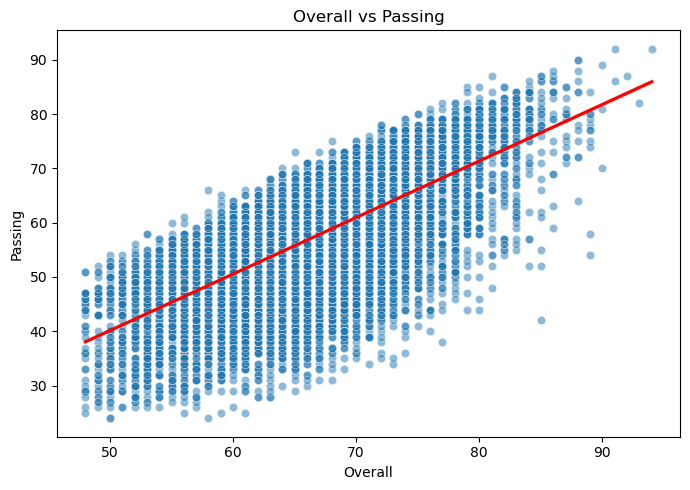

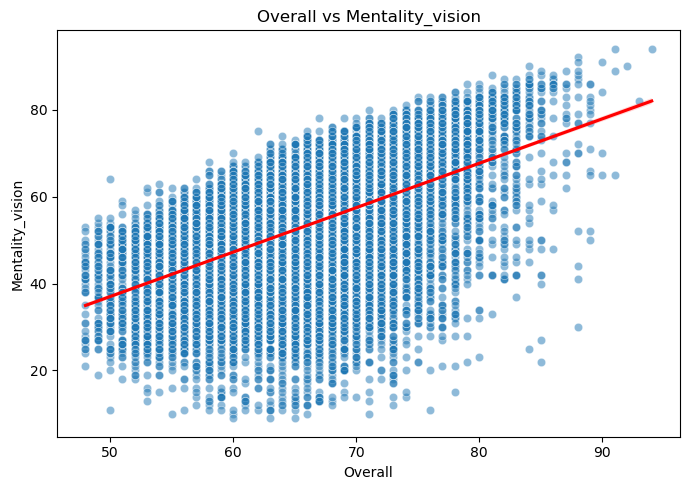

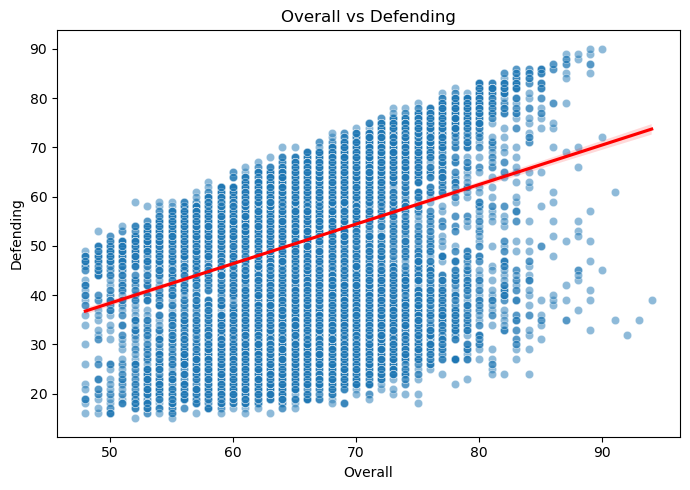

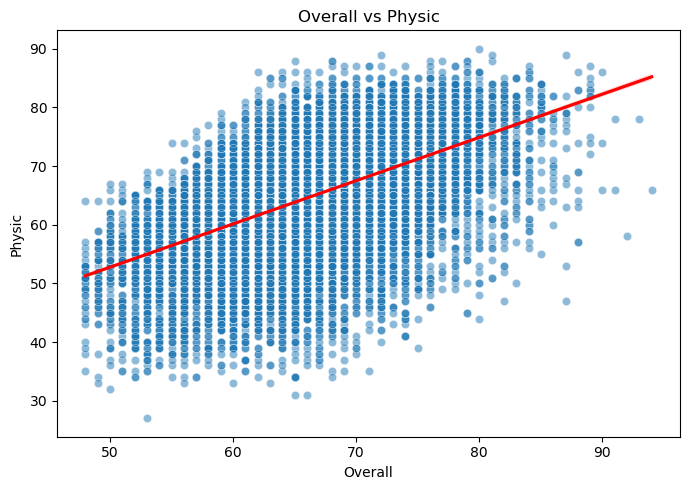

In [80]:
columns = ['pace','dribbling','shooting','passing','mentality_vision','defending','physic']
for col in columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='overall', y=col, data=df, alpha=0.5)
    sns.regplot(x='overall', y=col, data=df, scatter=False, color='red')
    plt.title(f"Overall vs {col.capitalize()}")
    plt.xlabel("Overall")
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()

#### Bivariate analysis describe that
* Age vs Overall - players improve until mid-20s, peak near 28–32, decline after 32-35.
* Age vs Potential - younger players have higher potential on average.
* Age vs Value (€) - transfer value peaks in 20–28 age range, drops after 30.
* Age vs Wage (€) - wages rise with age/experience but decline slightly after 30.
* overall and potential vs value_eur and wage_eur have positive relation


### Feature Engineering
1. Data Preprocessing

* Before handle missing value and outliers, first shortout all skill rating columns.

In [81]:
# Convert columns like "84+3" → 84 (base value only)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.extract(r'(\d+)')[0].astype(float)

* Now handle Missing values

In [82]:
pd.set_option('display.max_rows', None)   # show all rows
df.isnull().sum().to_frame('missing_count')

missing_count
sofifa_id                               0
player_url                              0
short_name                          18278
long_name                           18278
age                                     0
dob                                     0
height_cm                               0
weight_kg                               0
nationality                         18278
club                                17618
overall                                 0
potential                               0
value_eur                               0
wage_eur                                0
player_positions                    18278
preferred_foot                      18278
international_reputation                0
weak_foot                               0
skill_moves                             0
work_rate                           18278
body_type                           18277
real_face                           18278
release_clause_eur                   1298
player_tags                         18278
team_position                       18278
team_jersey_number                    240
loaned_from                         18247
joined                               1288
contract_valid_until                  240
nation_position                     18278
nation_jersey_number                17152
pace                                 2036
shooting                             2036
passing                              2036
dribbling                            2036
defending                            2036
physic                               2036
gk_diving                           16242
gk_handling                         16242
gk_kicking                          16242
gk_reflexes                         16242
gk_speed                            16242
gk_positioning                      16242
player_traits                       18277
attacking_crossing                      0
attacking_finishing                     0
attacking_heading_accuracy              0
attacking_short_passing                 0
attacking_volleys                       0
skill_dribbling                         0
skill_curve                             0
skill_fk_accuracy                       0
skill_long_passing                      0
skill_ball_control                      0
movement_acceleration                   0
movement_sprint_speed                   0
movement_agility                        0
movement_reactions                      0
movement_balance                        0
power_shot_power                        0
power_jumping                           0
power_stamina                           0
power_strength                          0
power_long_shots                        0
mentality_aggression                    0
mentality_interceptions                 0
mentality_positioning                   0
mentality_vision                        0
mentality_penalties                     0
mentality_composure                     0
defending_marking                       0
defending_standing_tackle               0
defending_sliding_tackle                0
goalkeeping_diving                      0
goalkeeping_handling                    0
goalkeeping_kicking                     0
goalkeeping_positioning                 0
goalkeeping_reflexes                    0
ls                                   2036
st                                   2036
rs                                   2036
lw                                   2036
lf                                   2036
cf                                   2036
rf                                   2036
rw                                   2036
lam                                  2036
cam                                  2036
ram                                  2036
lm                                   2036
lcm                                  2036
cm                                   2036
rcm                                  2036
rm                                   2036
lwb                                  2

* Messi doesn’t play center-back (CB) or goalkeeper - those columns are NaN
* Van Dijk doesn’t play striker → ST is NaN
* Goalkeepers don’t have ratings for outfield positions → almost all NaN
* So these are not missing values — they’re not applicable.

In [83]:
columns = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace','shooting',
'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
'attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
'skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
'movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
'mentality_vision','mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes',
'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb',
'rcb','rb']

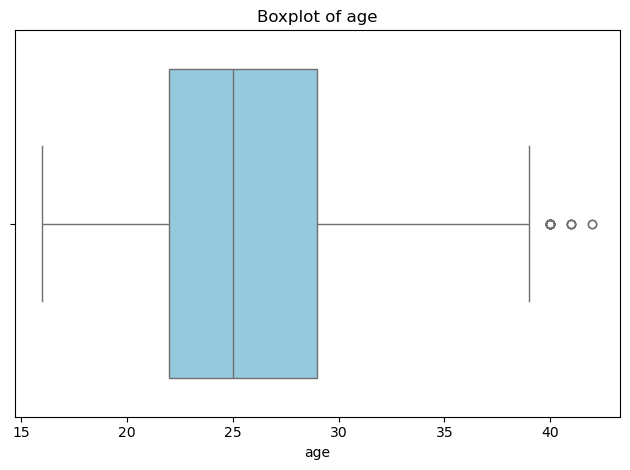

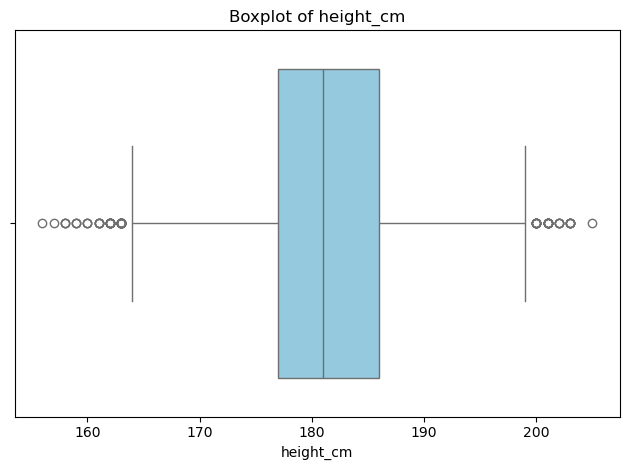

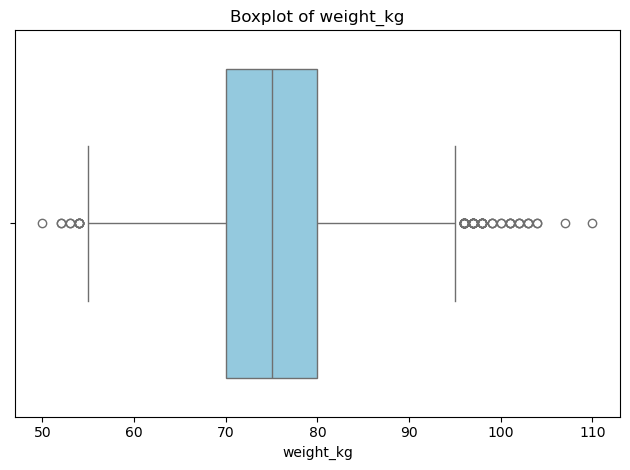

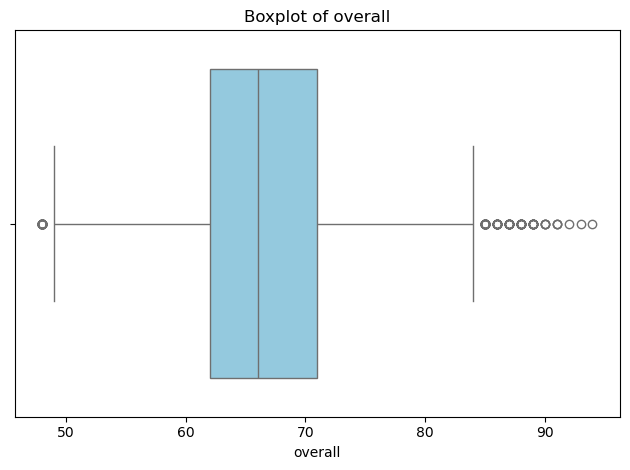

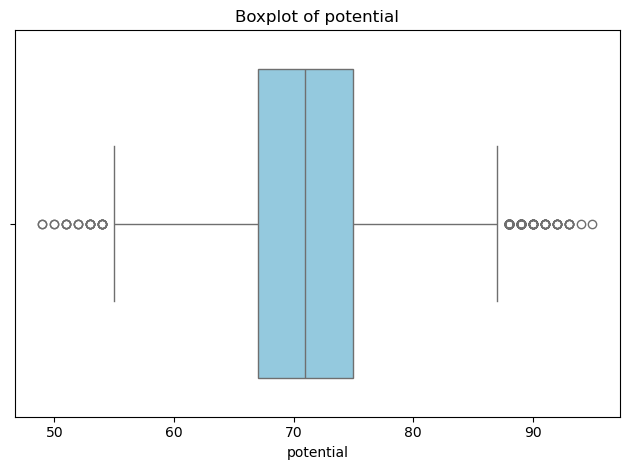

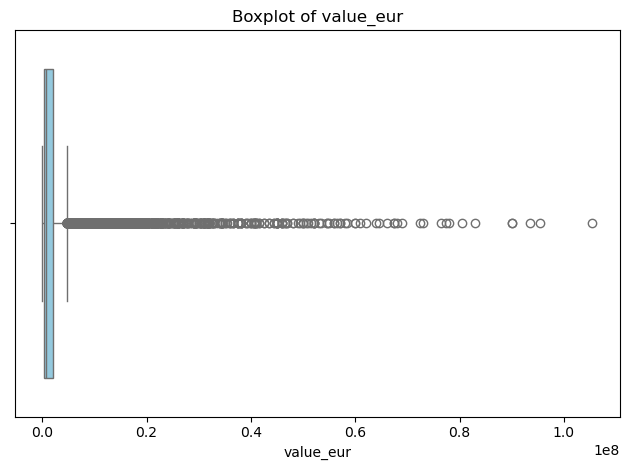

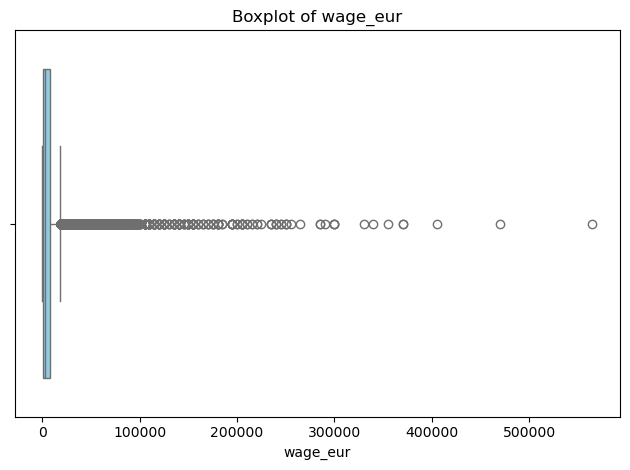

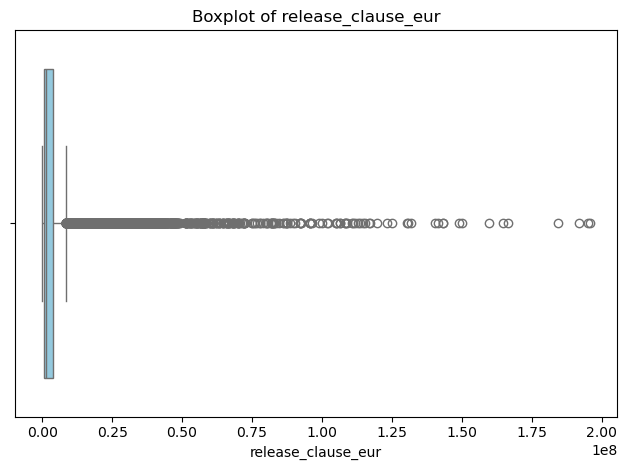

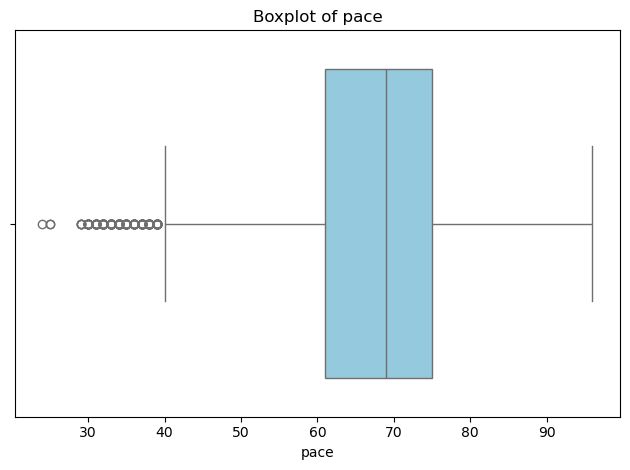

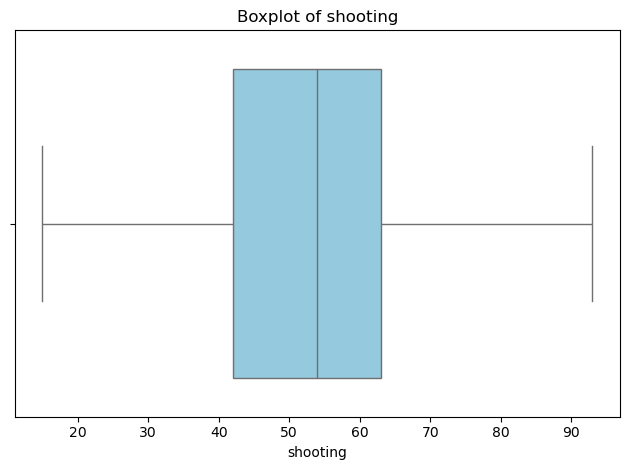

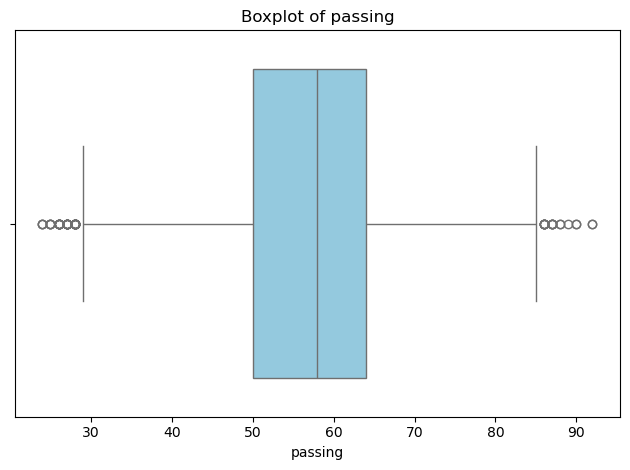

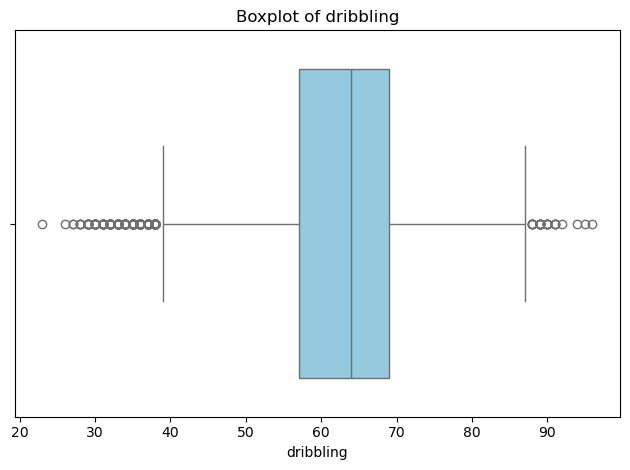

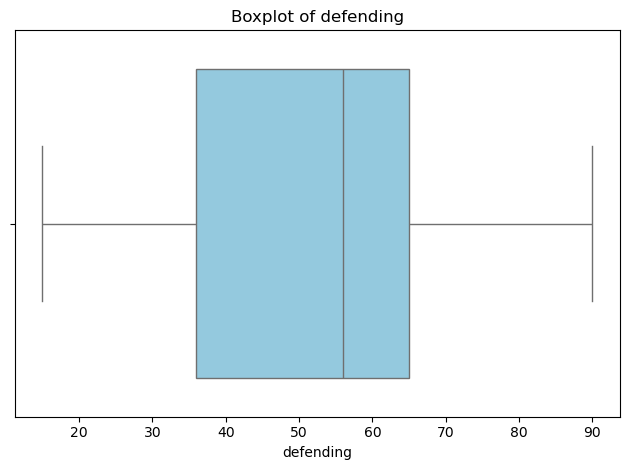

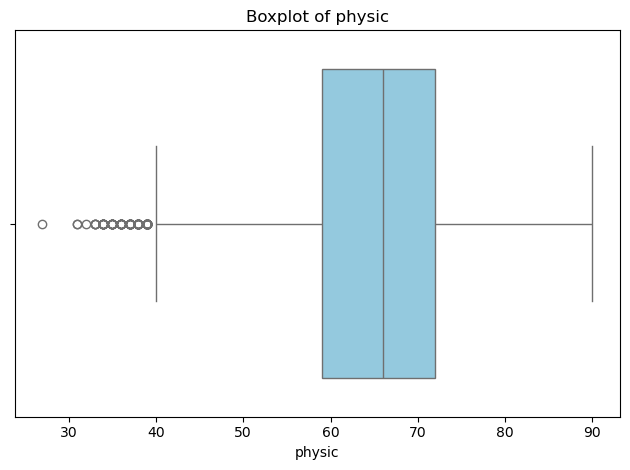

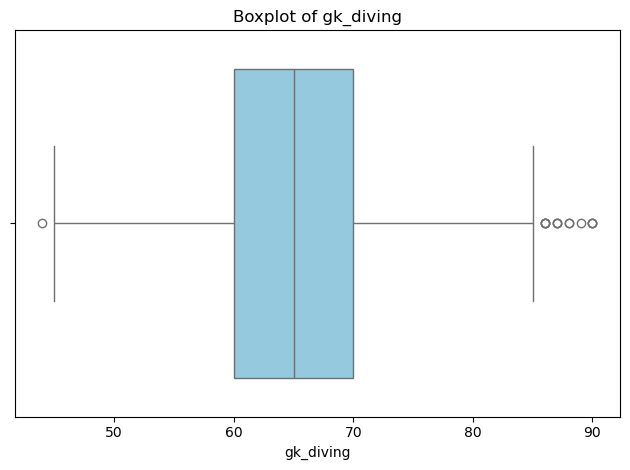

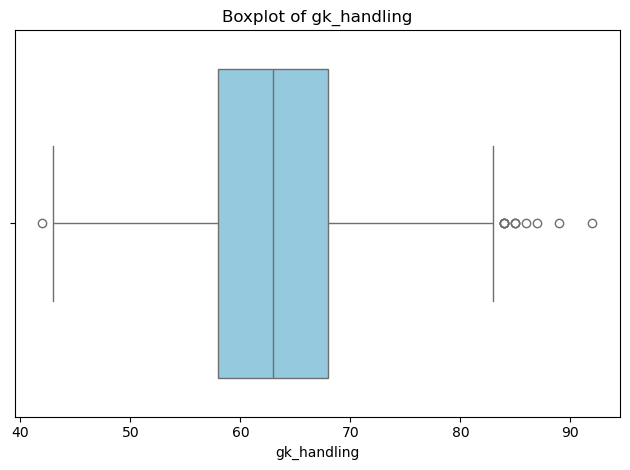

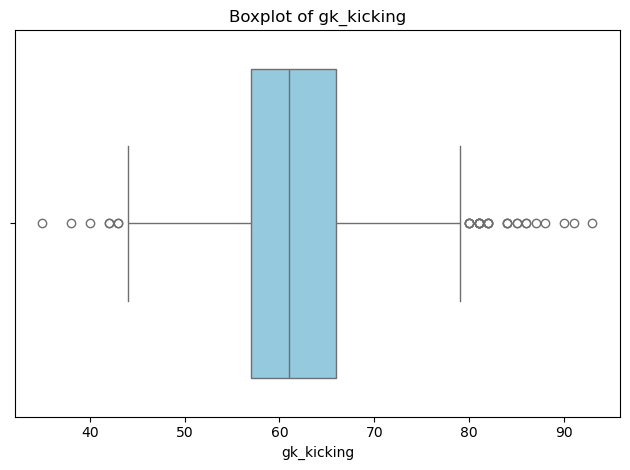

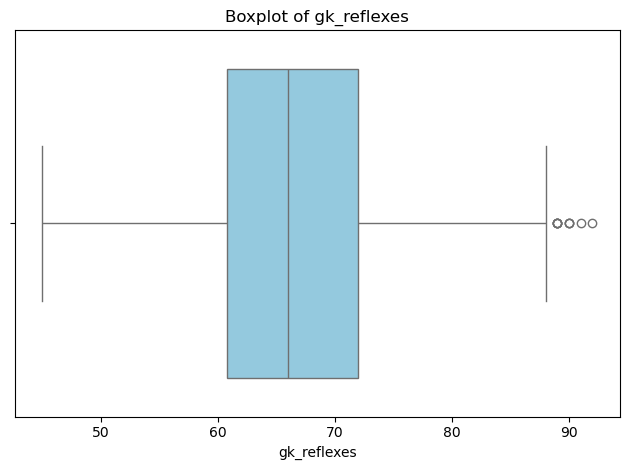

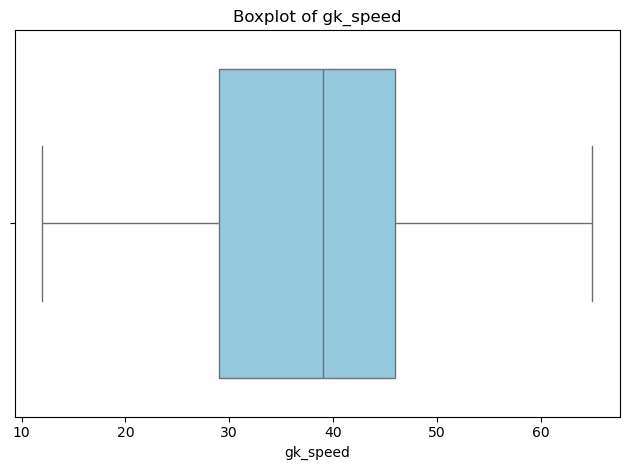

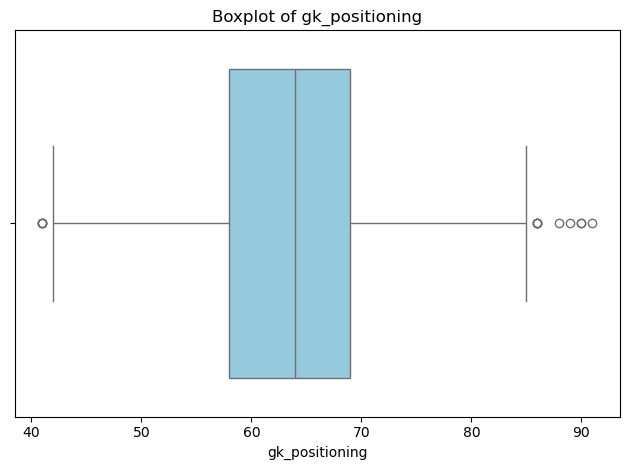

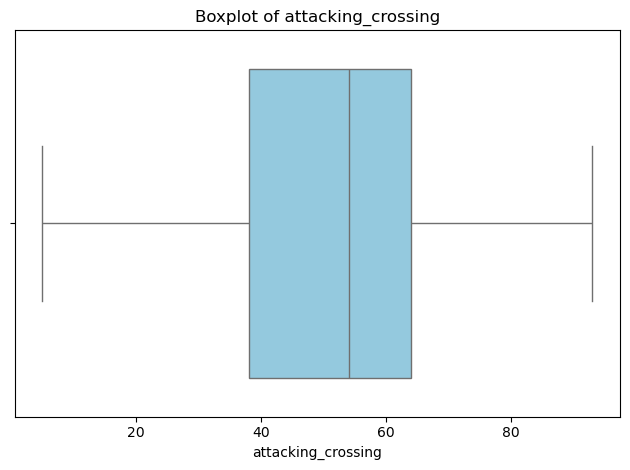

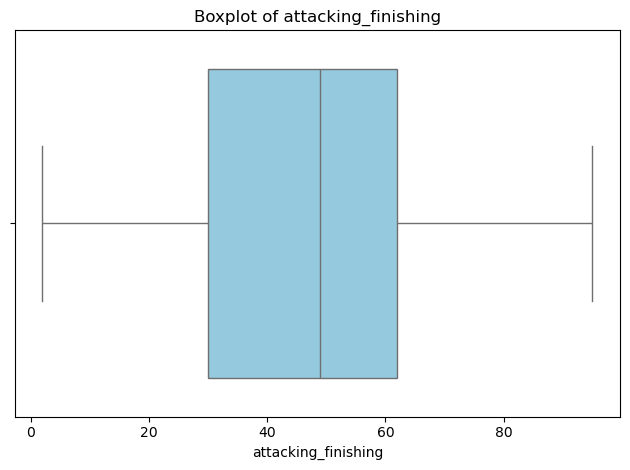

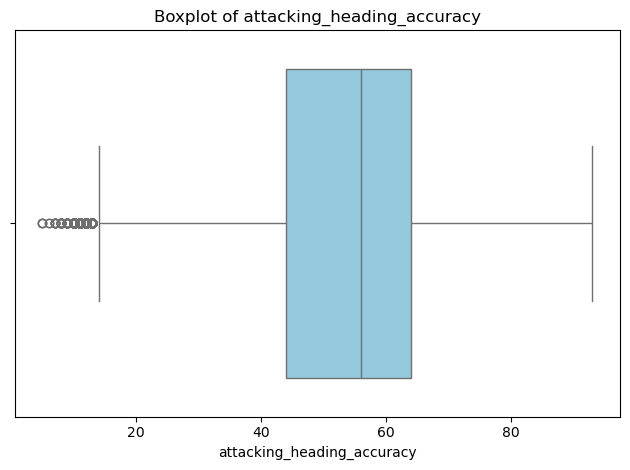

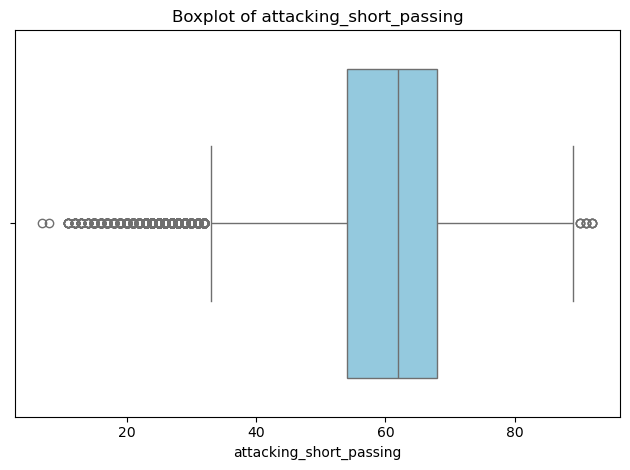

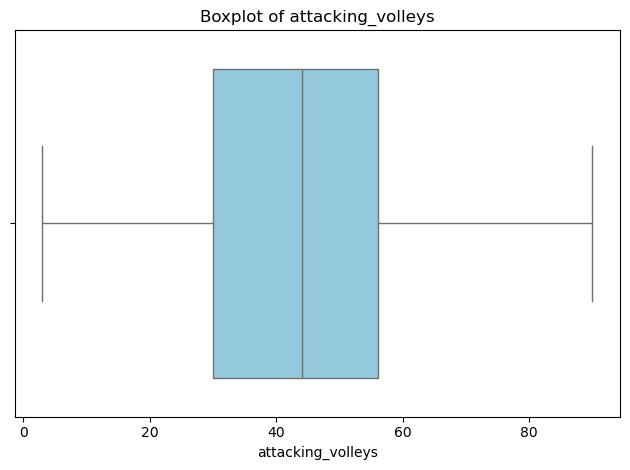

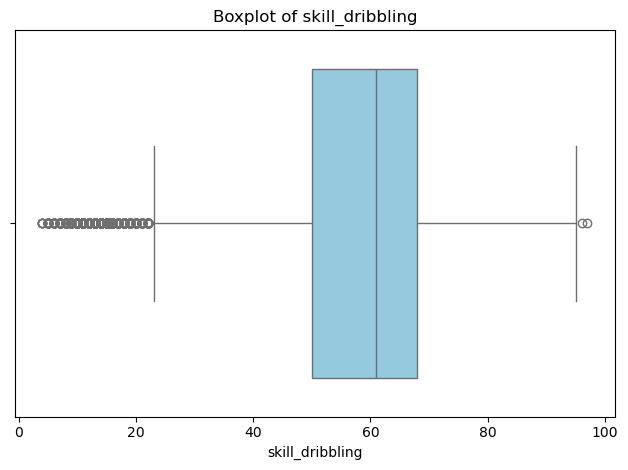

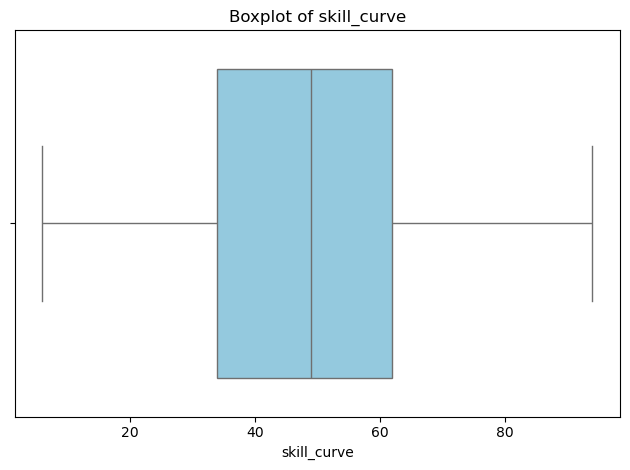

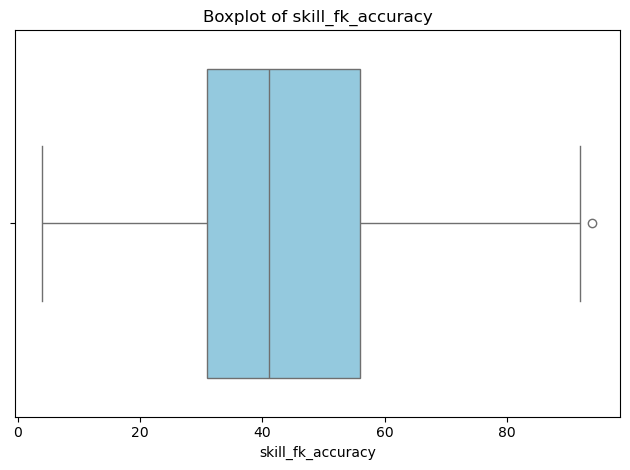

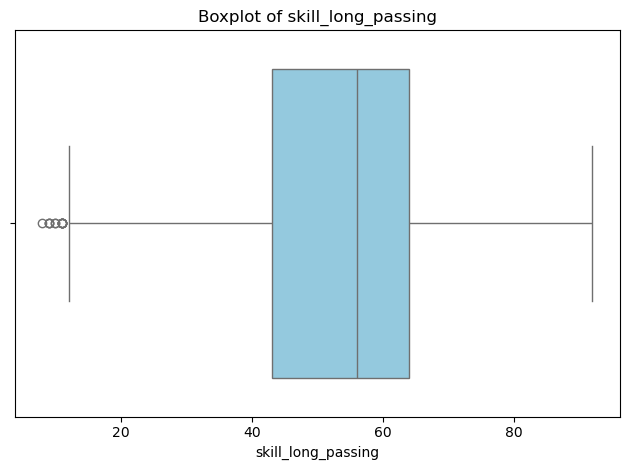

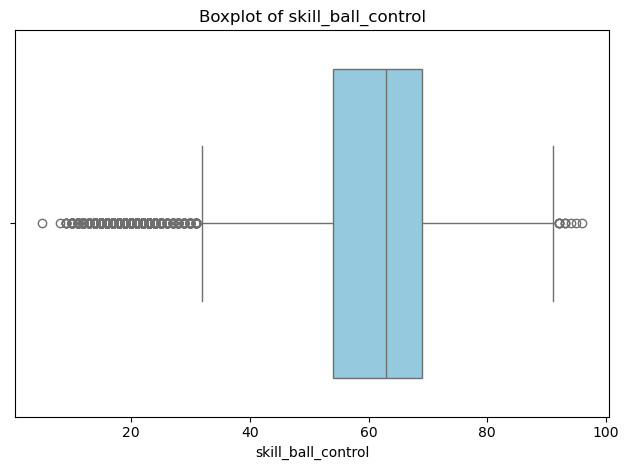

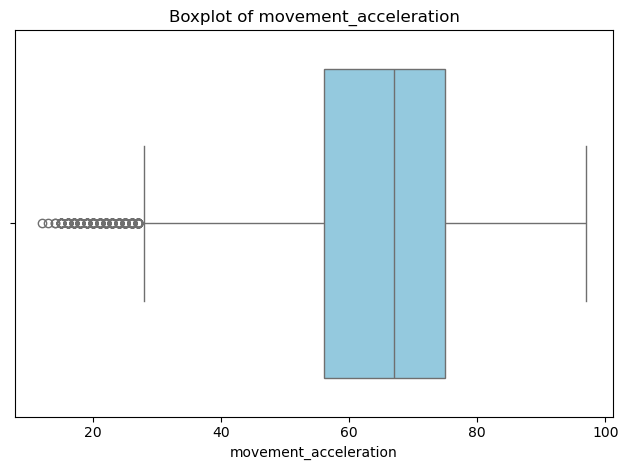

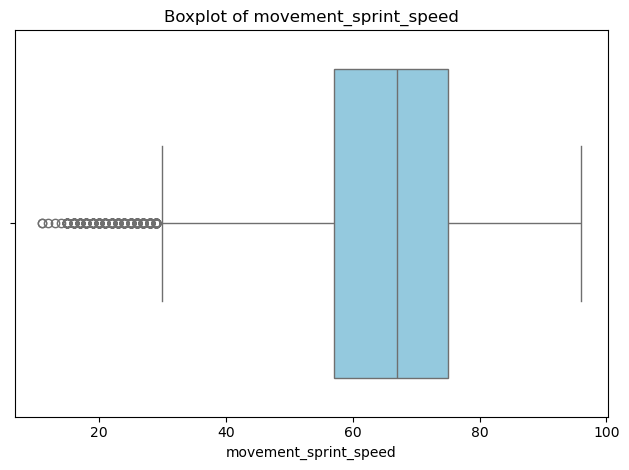

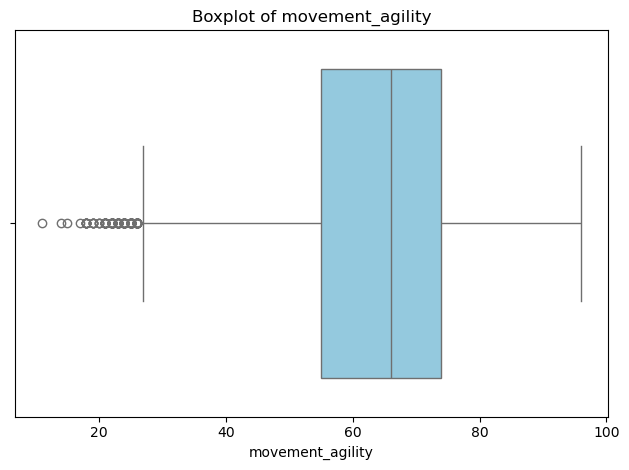

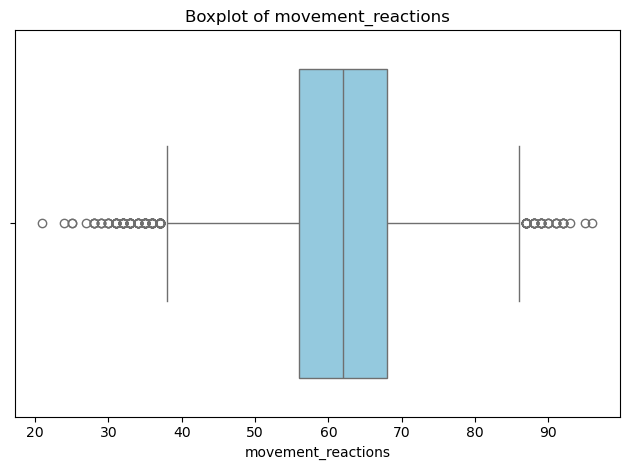

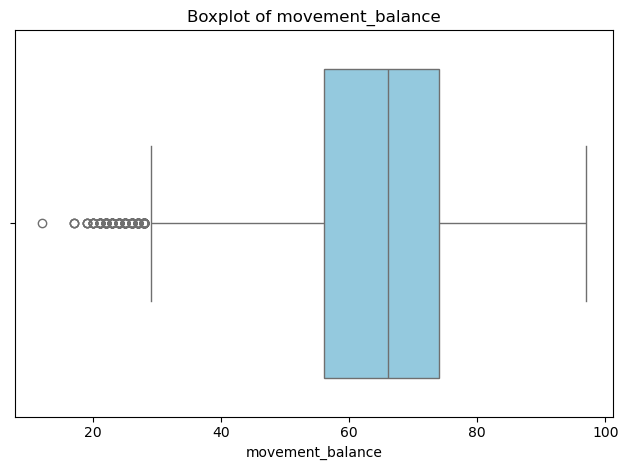

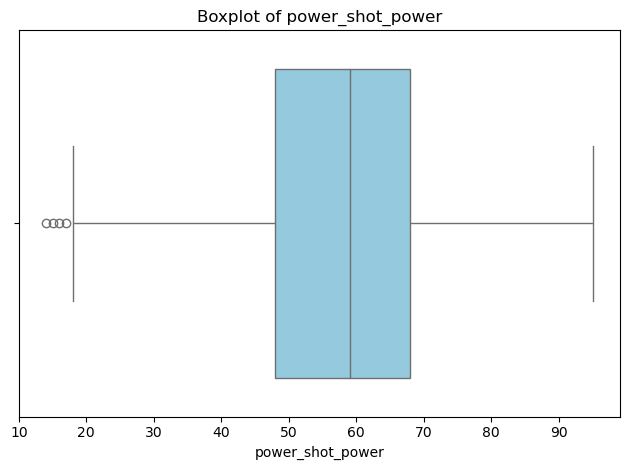

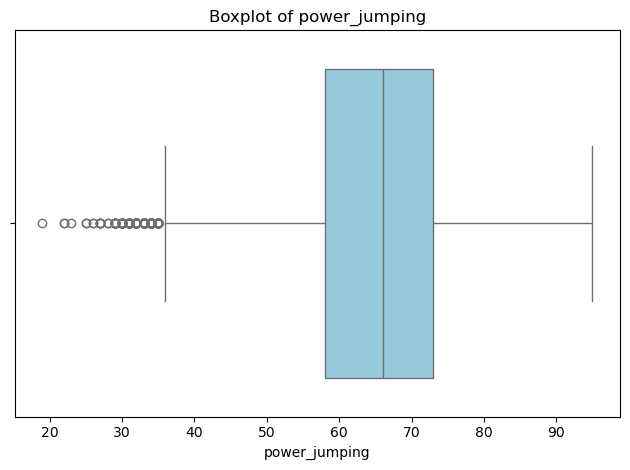

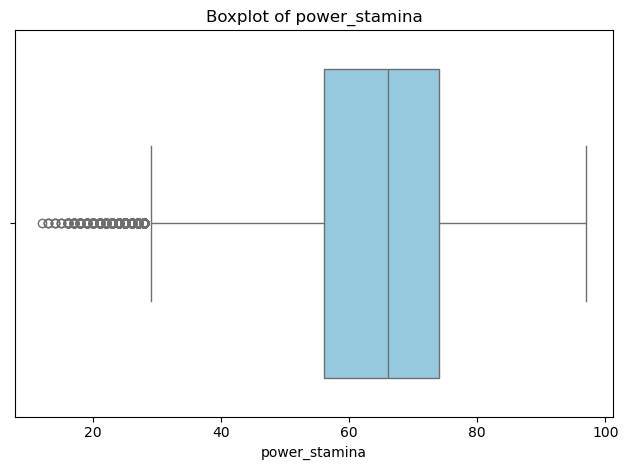

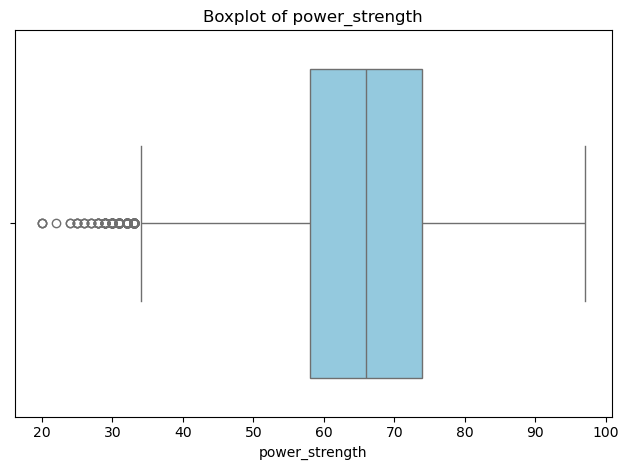

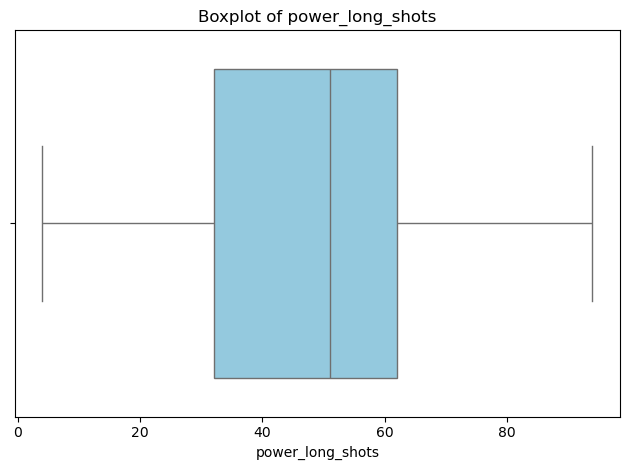

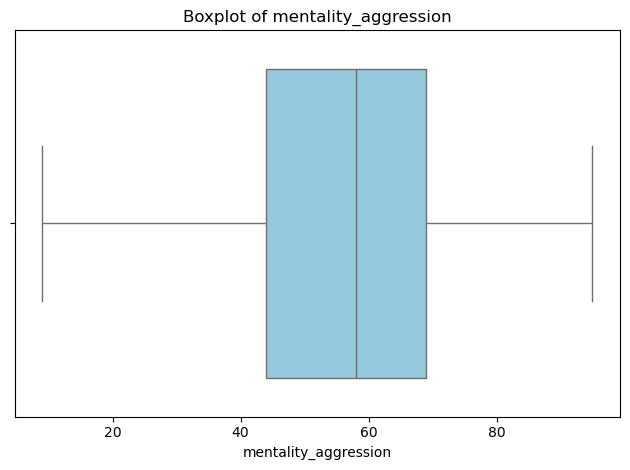

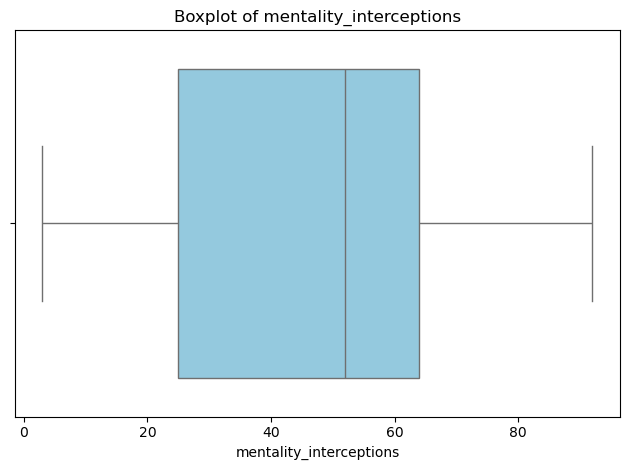

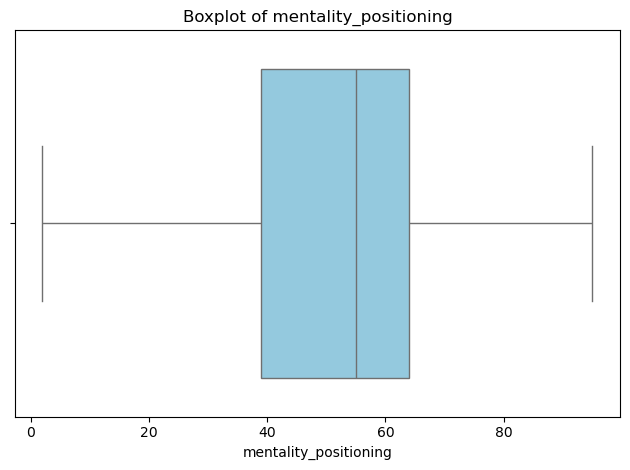

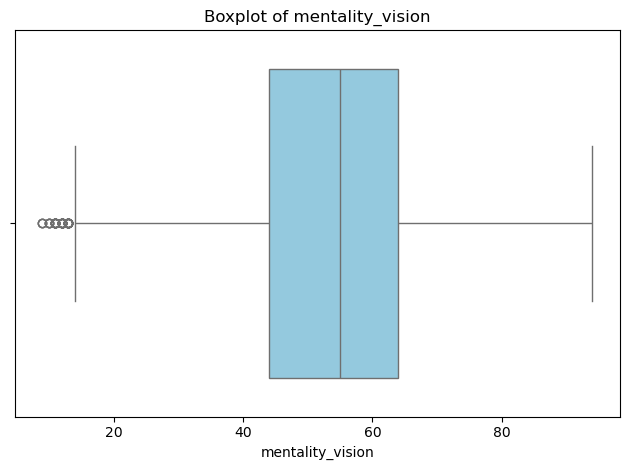

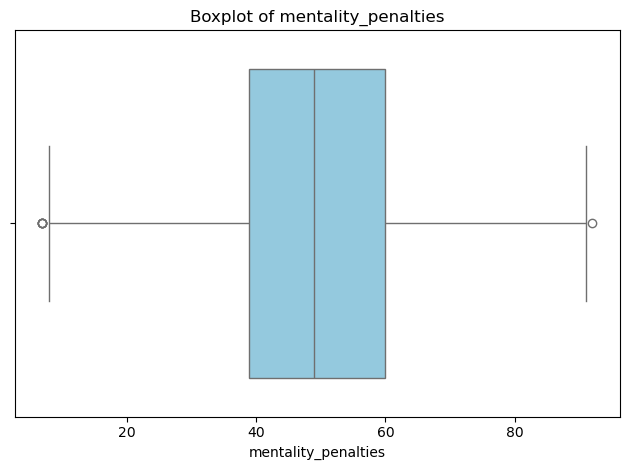

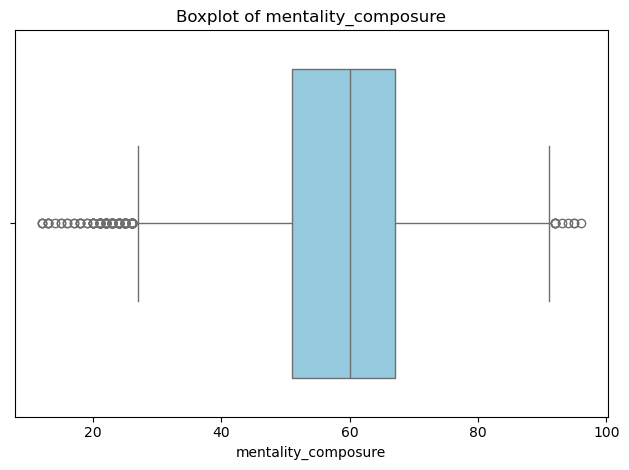

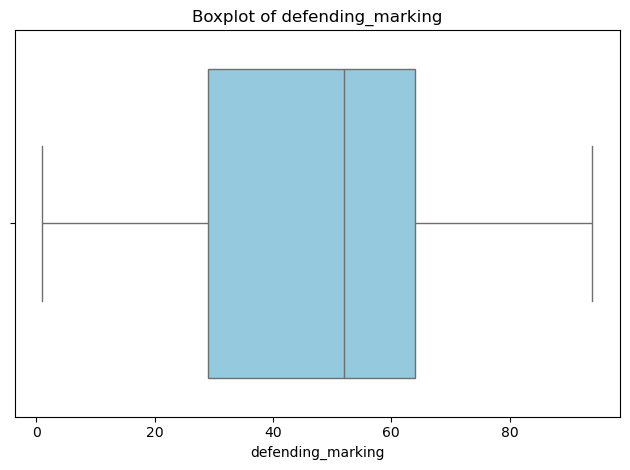

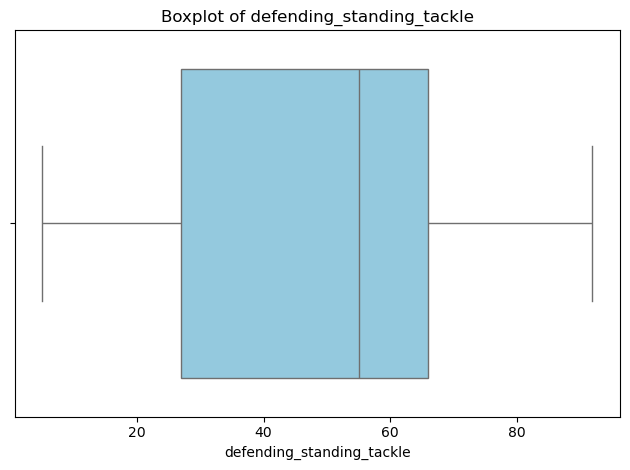

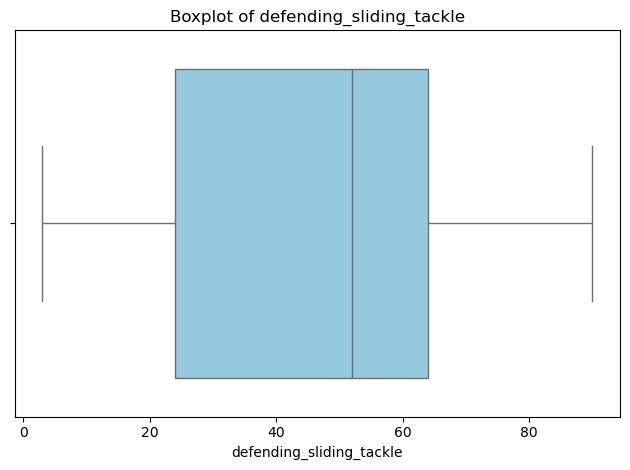

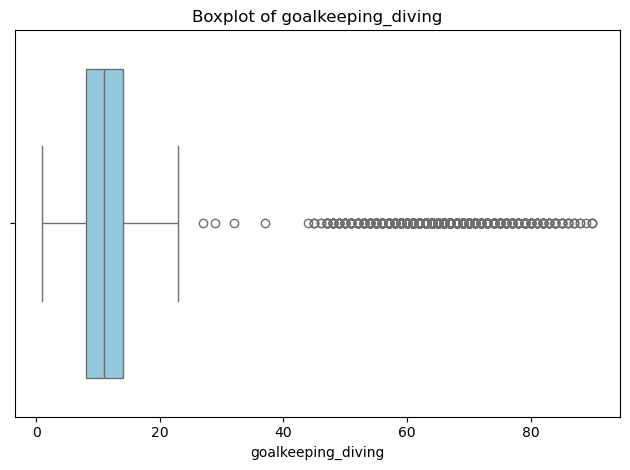

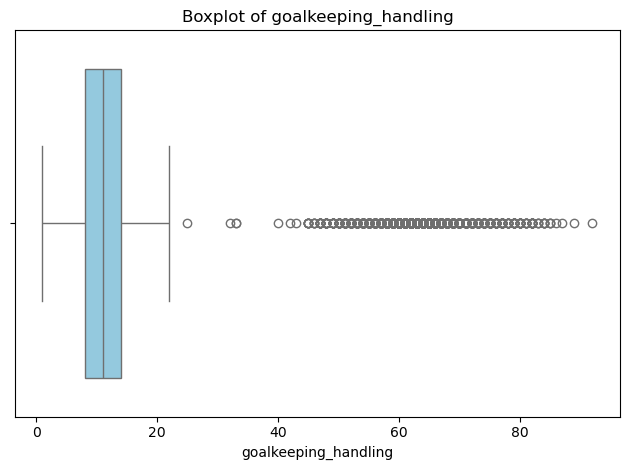

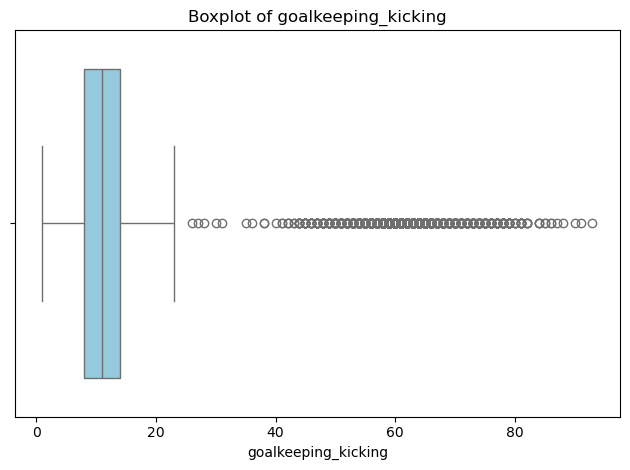

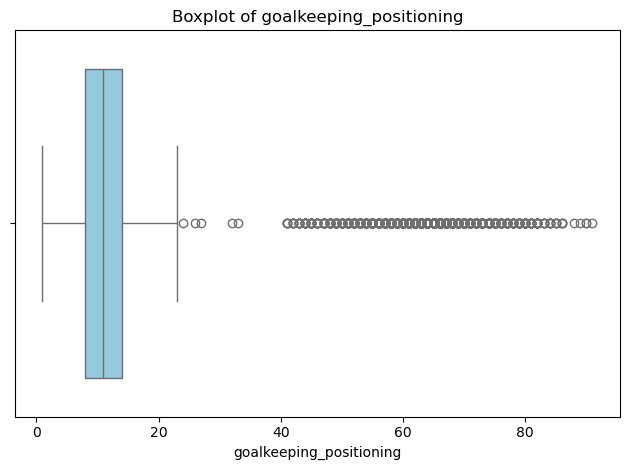

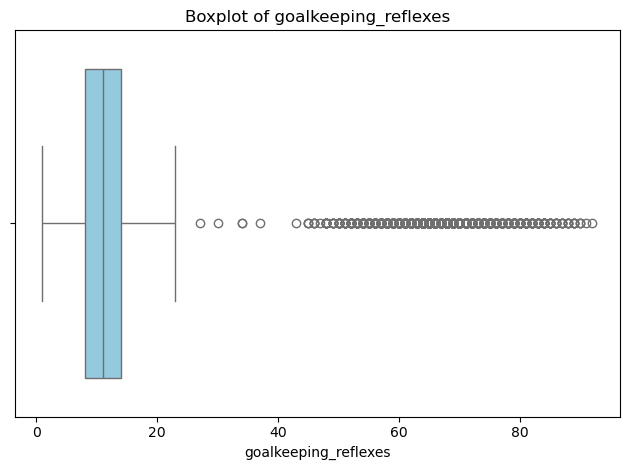

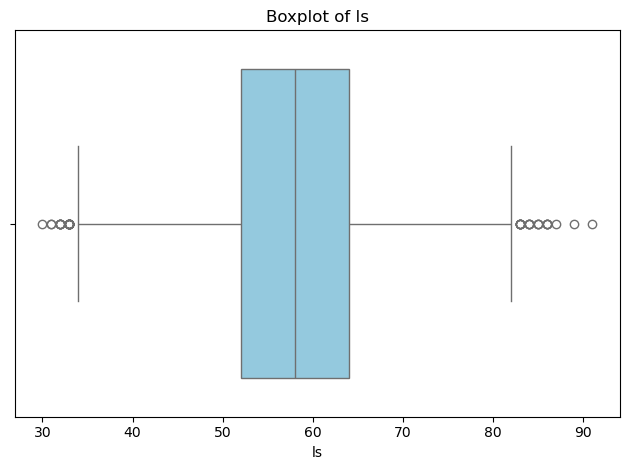

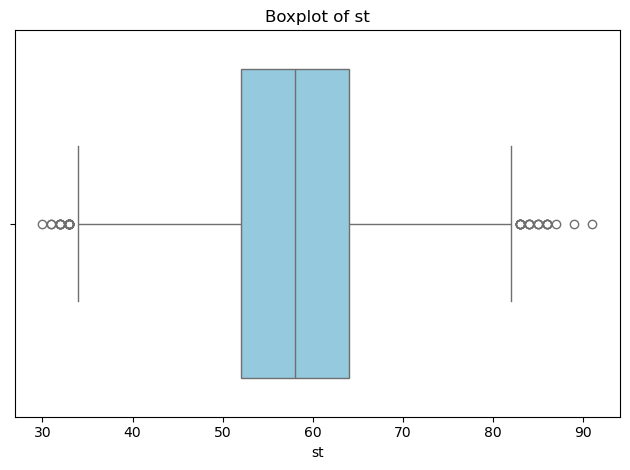

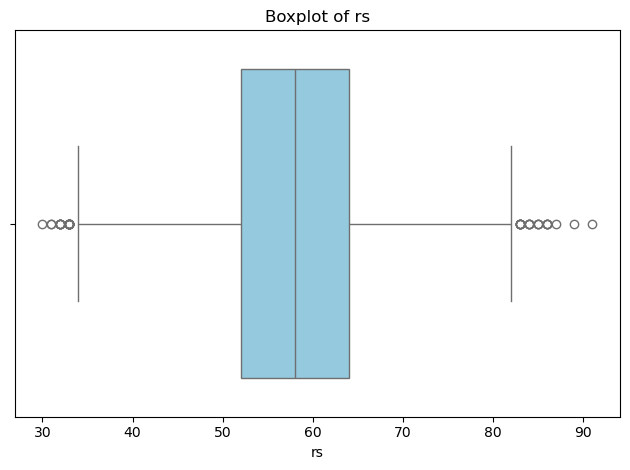

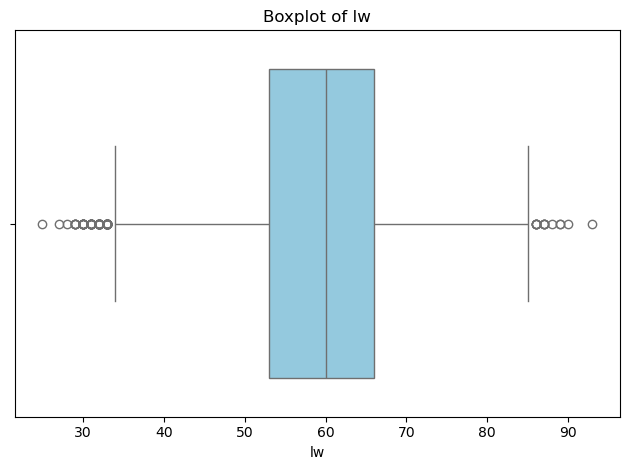

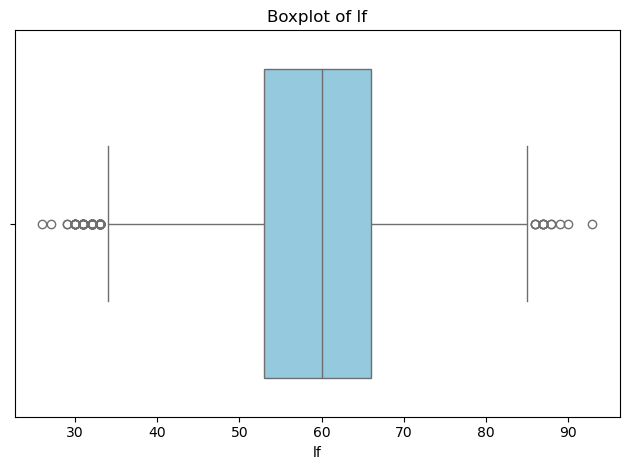

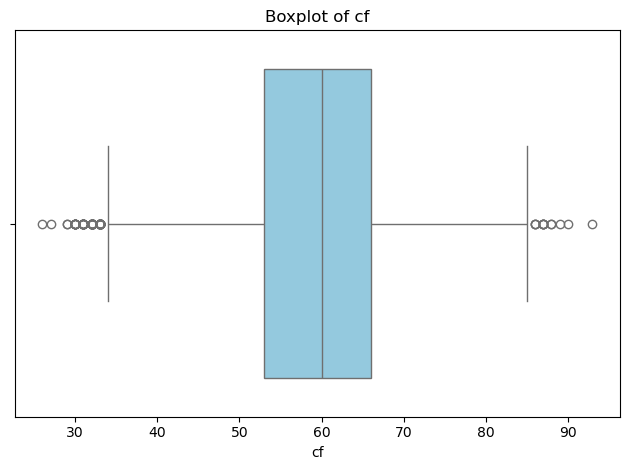

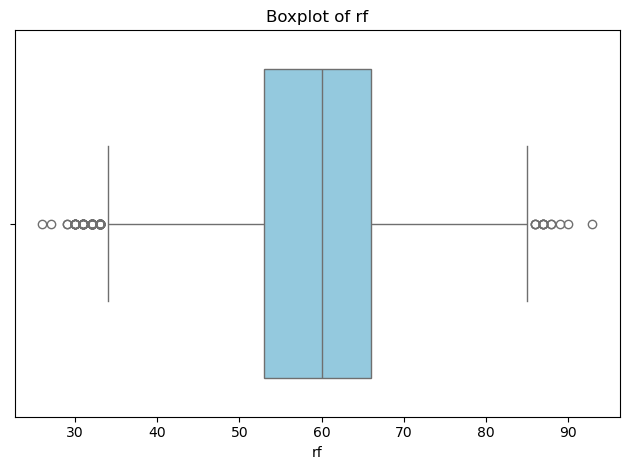

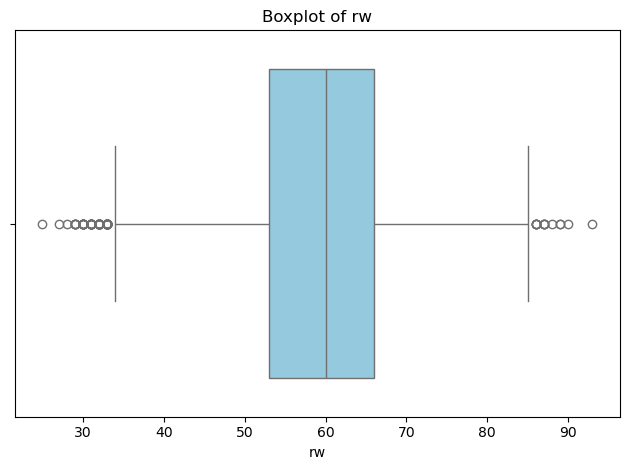

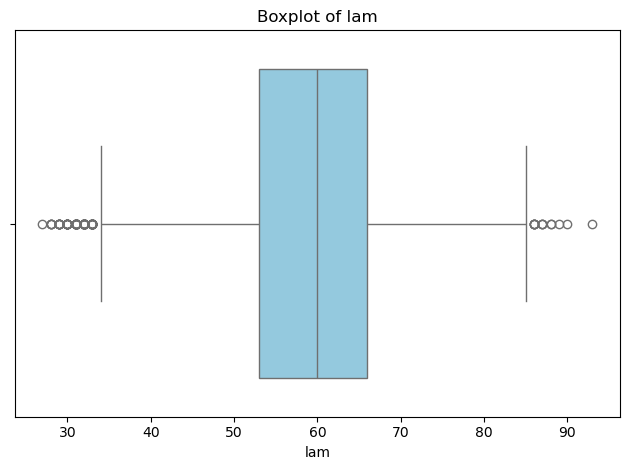

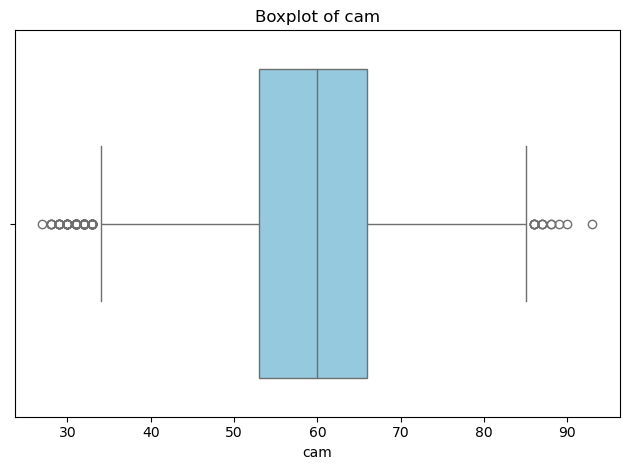

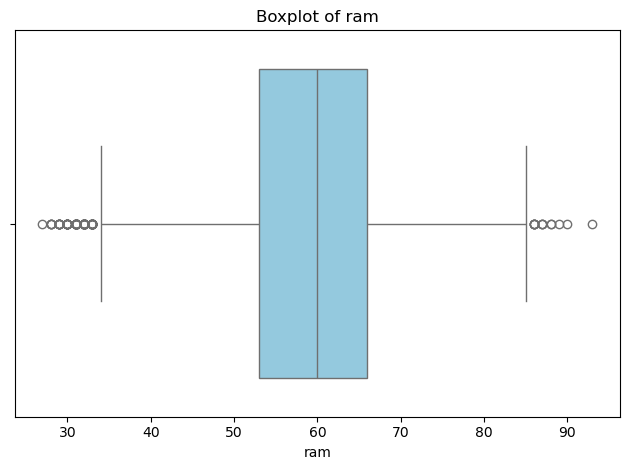

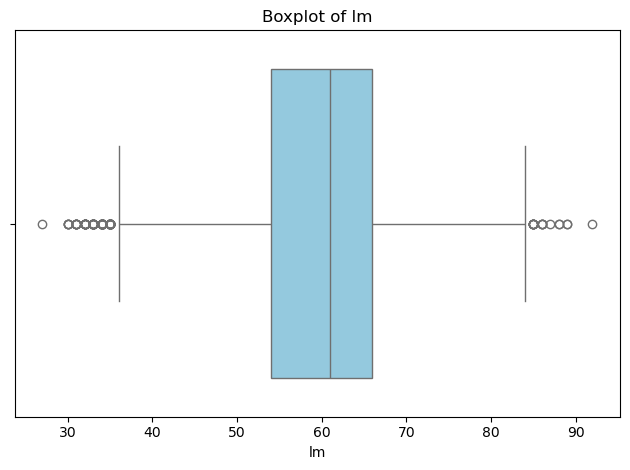

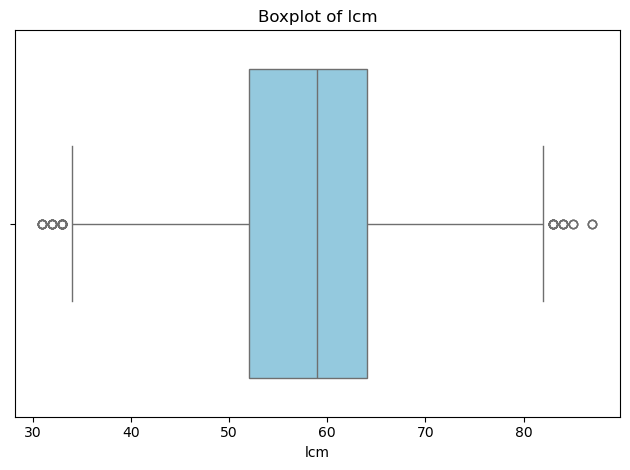

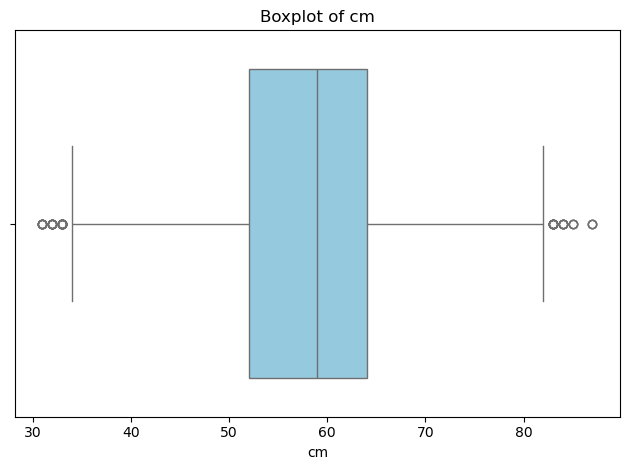

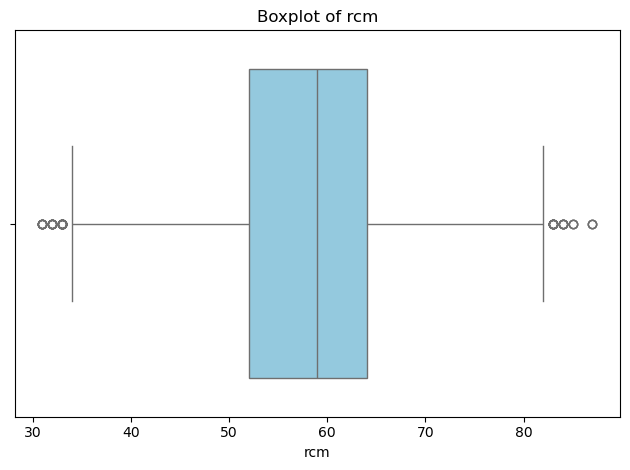

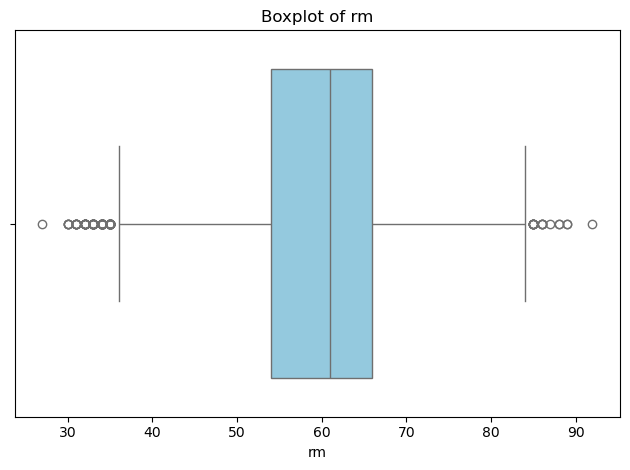

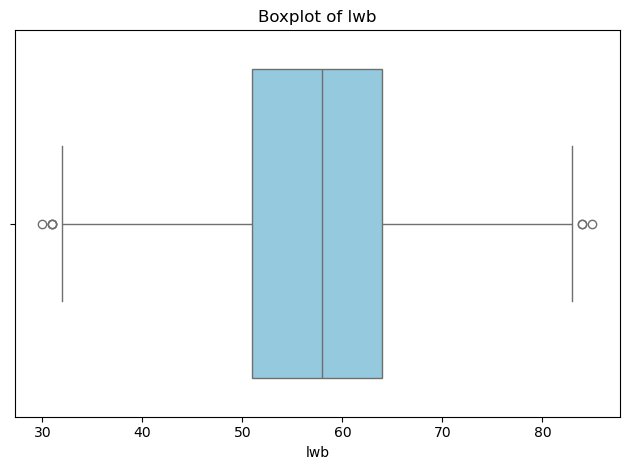

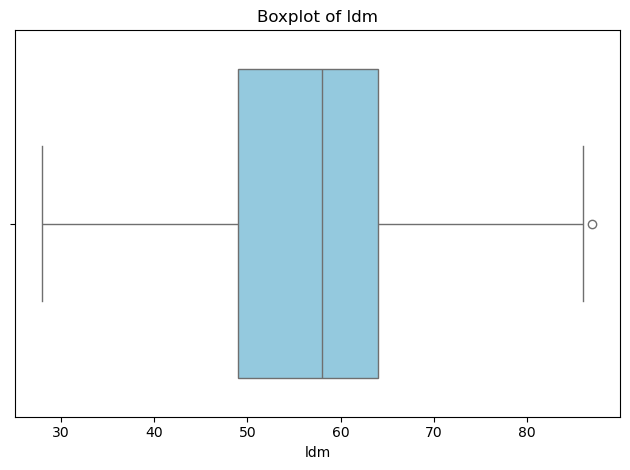

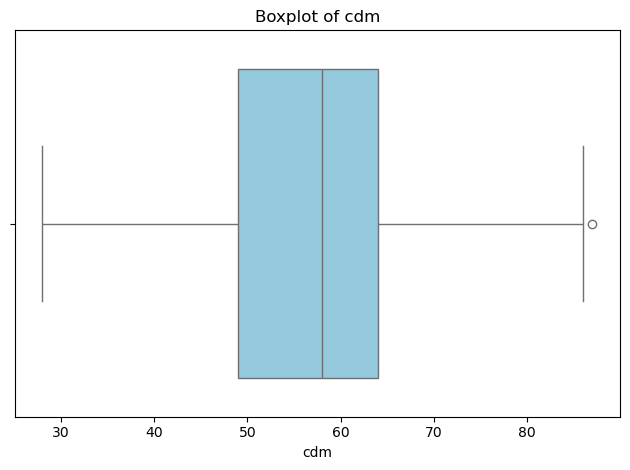

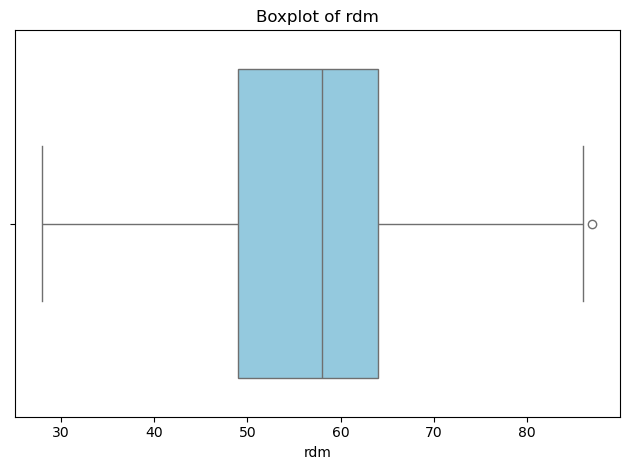

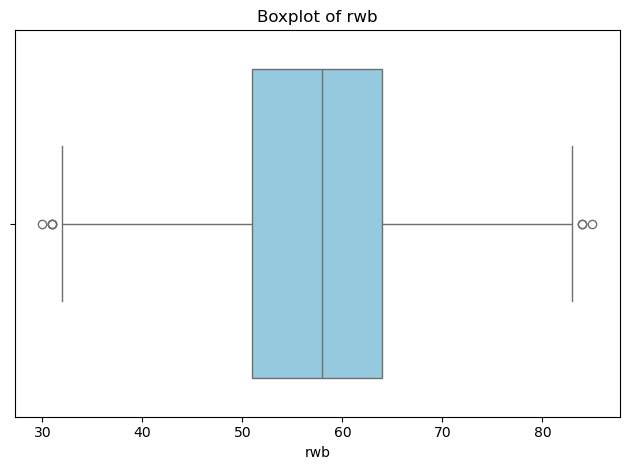

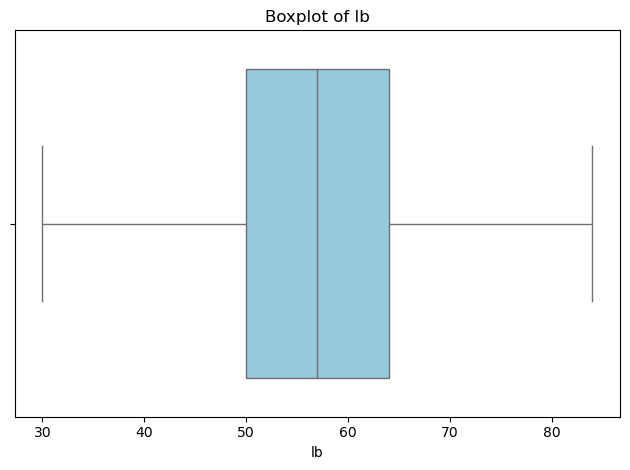

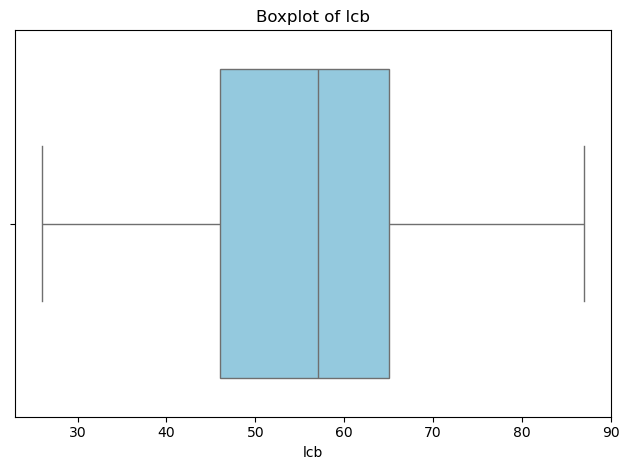

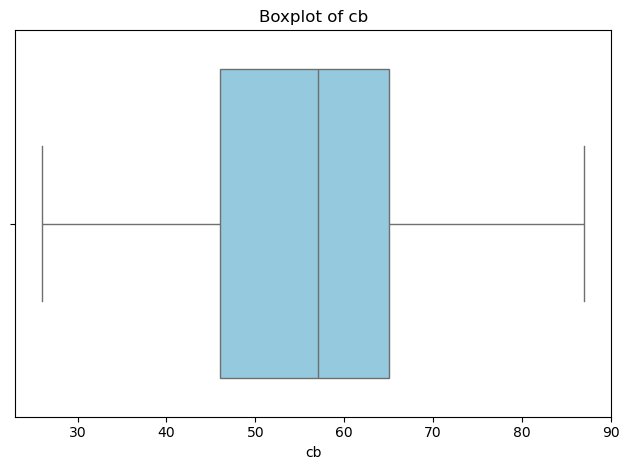

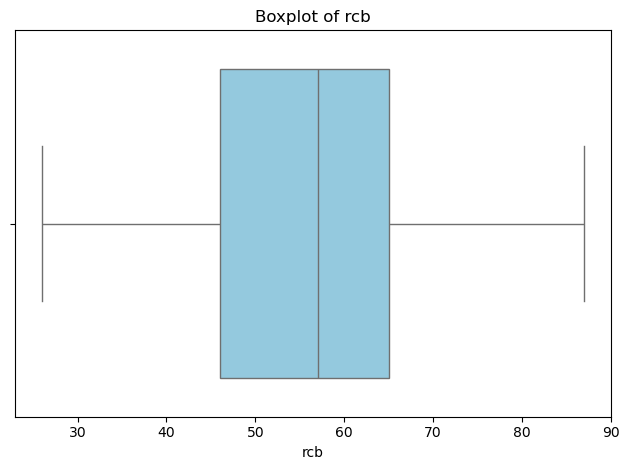

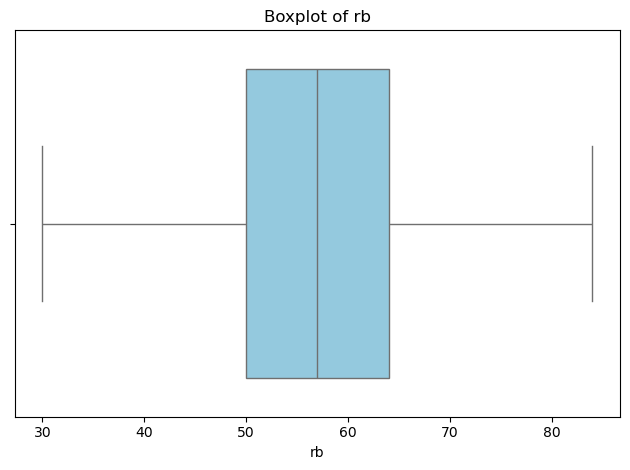

In [84]:
for i in columns:
    sns.boxplot(x=df[i], color='skyblue')
    plt.title(f"Boxplot of {i}")
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

# **Boxplot analysis for outliers**
1. There are very few columns where need to handle outliers
* age,height_cm,weight_kg
* Because a few player have unrealistic ages and rare incorect height and weight values.
2. overall, potential, there are real skill variation and no need to handle outliers.
3. For value_eur,wage_eur,release_clause_eur, we use log1p for transform this value.; Here we use RobustScaler too.
* it scales each feature based on median and IQR , so extreme values(like massi,ronaldo's wage) won't distort clustering.
* It Keeps Messi's data but reduces its dominance in distance metrics.
4. Skill & attributes - if values are <0 0r >100 then we replace it with median.
Position Ratings (st,cam,etc..) - leave as it is
* there are some missing values in goalkeeping and postion ratings. In actual, those are not Nan value but those are not applicable
for example, messi position-> RW, gk_diving-> Nan
manual neuer position->GK , cam -> Nan
so, like this outfield players and GK have Nan value which are not true outliers.

In [85]:
Outliers_columns = ['age','height_cm','weight_kg']
for i in Outliers_columns:
    print(i,"min:",df[i].min(),
         "max:",df[i].max())

age min: 16 max: 42
height_cm min: 156 max: 205
weight_kg min: 50 max: 110


In [86]:
for i in Outliers_columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    df.loc[df[i]<lower_boundary,i] = df[i].median()
    df.loc[df[i]>upper_boundary,i] = df[i].median()

**Transform Data**
* value_eur, wage_eur, release_clause_eur, we are usinng log1p to transform.

In [87]:
df['log_value_eur'] = np.log1p(df['value_eur'])
df['log_wage_eur'] = np.log1p(df['wage_eur'])
df['log_release_clause_eur'] = np.log1p(df['release_clause_eur'])

In [88]:
df[['log_value_eur', 'log_wage_eur', 'log_release_clause_eur']].head()

log_value_eur  log_wage_eur  log_release_clause_eur
0      18.374637     13.244583               19.092604
1      17.884537     12.911645               18.385054
2      18.474222     12.577640               19.089535
3      18.165789     11.736077               18.919636
4      18.315320     13.060490               19.033160

In [89]:
df['log_release_clause_eur'] = df['log_release_clause_eur'].fillna(df['log_release_clause_eur'].median())

**Feature selection**

In [90]:
# first we drop unwanted columns
df.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','international_reputation',
 'weak_foot','preferred_foot',
        'work_rate','body_type','real_face','player_tags','team_position','loaned_from','team_jersey_number',
        'joined','contract_valid_until','nation_position','nation_jersey_number','player_traits','value_eur','release_clause_eur',
 'wage_eur',],axis=1,inplace=True)

* Divide our data two parts.
  * 1. Goalkeeper
  * 2. Outfield Players(forwards,midfielders,defenders)

In [91]:
Outfield_player_columns = []
for i in df.columns:
    if 'gk' not in i:
        Outfield_player_columns.append(i)
Outfield_player_columns

['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',


In [92]:
Outfield_player_df = df[Outfield_player_columns].dropna(subset=Outfield_player_columns)

In [93]:
Outfield_player_df.head()

age  height_cm  weight_kg  overall  potential  skill_moves  pace  shooting  \
0   32        170         72       94         94            4  87.0      92.0   
1   34        187         83       93         93            5  90.0      93.0   
2   27        175         68       92         92            5  91.0      85.0   
4   28        175         74       91         91            4  91.0      83.0   
5   28        181         70       91         91            4  76.0      86.0   

   passing  dribbling  defending  physic  attacking_crossing  \
0     92.0       96.0       39.0    66.0                  88   
1     82.0       89.0       35.0    78.0                  84   
2     87.0       95.0       32.0    58.0                  87   
4     86.0       94.0       35.0    66.0                  81   
5     92.0       86.0       61.0    78.0                  93   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
4                   84                          61                       89   
5                   82                          55                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
4                 83               95           83                 79   
5                 82               86           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
4                  83                  94                     94   
5                  91                  91                     77   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
4                     88                95                  90   
5                     76                78                  91   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
4                94                82             56             84   
5                76                91             63             89   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   
4              63                80                    54   
5              74                90                    76   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   
4                       41                     87                89   
5                       61                     88                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95               

In [94]:
Outfield_player_df.isnull().sum() # Now there is no any null value

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
skill_moves                   0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_lo

* Applying RobustScaller on Outfield_players.

In [95]:
from sklearn.preprocessing import RobustScaler
Outfield_players_scaler = RobustScaler()
Scaled_Outfield_players = Outfield_players_scaler.fit_transform(Outfield_player_df)
Scaled_Outfield_players

array([[ 1.        , -1.11111111, -0.22222222, ...,  2.57435215,
         2.38482705,  3.02068773],
       [ 1.28571429,  0.77777778,  1.        , ...,  2.31403878,
         2.23323916,  2.60118121],
       [ 0.28571429, -0.55555556, -0.66666667, ...,  2.62724596,
         2.08116537,  3.01886808],
       ...,
       [-0.85714286,  0.66666667,  0.11111111, ..., -1.55687322,
        -0.49989891, -1.68476452],
       [-1.        ,  0.55555556,  0.        , ..., -1.55687322,
        -0.49989891, -1.68476452],
       [ 0.14285714,  0.22222222,  0.44444444, ..., -1.55687322,
        -0.18453391,  0.        ]])

<Axes: >

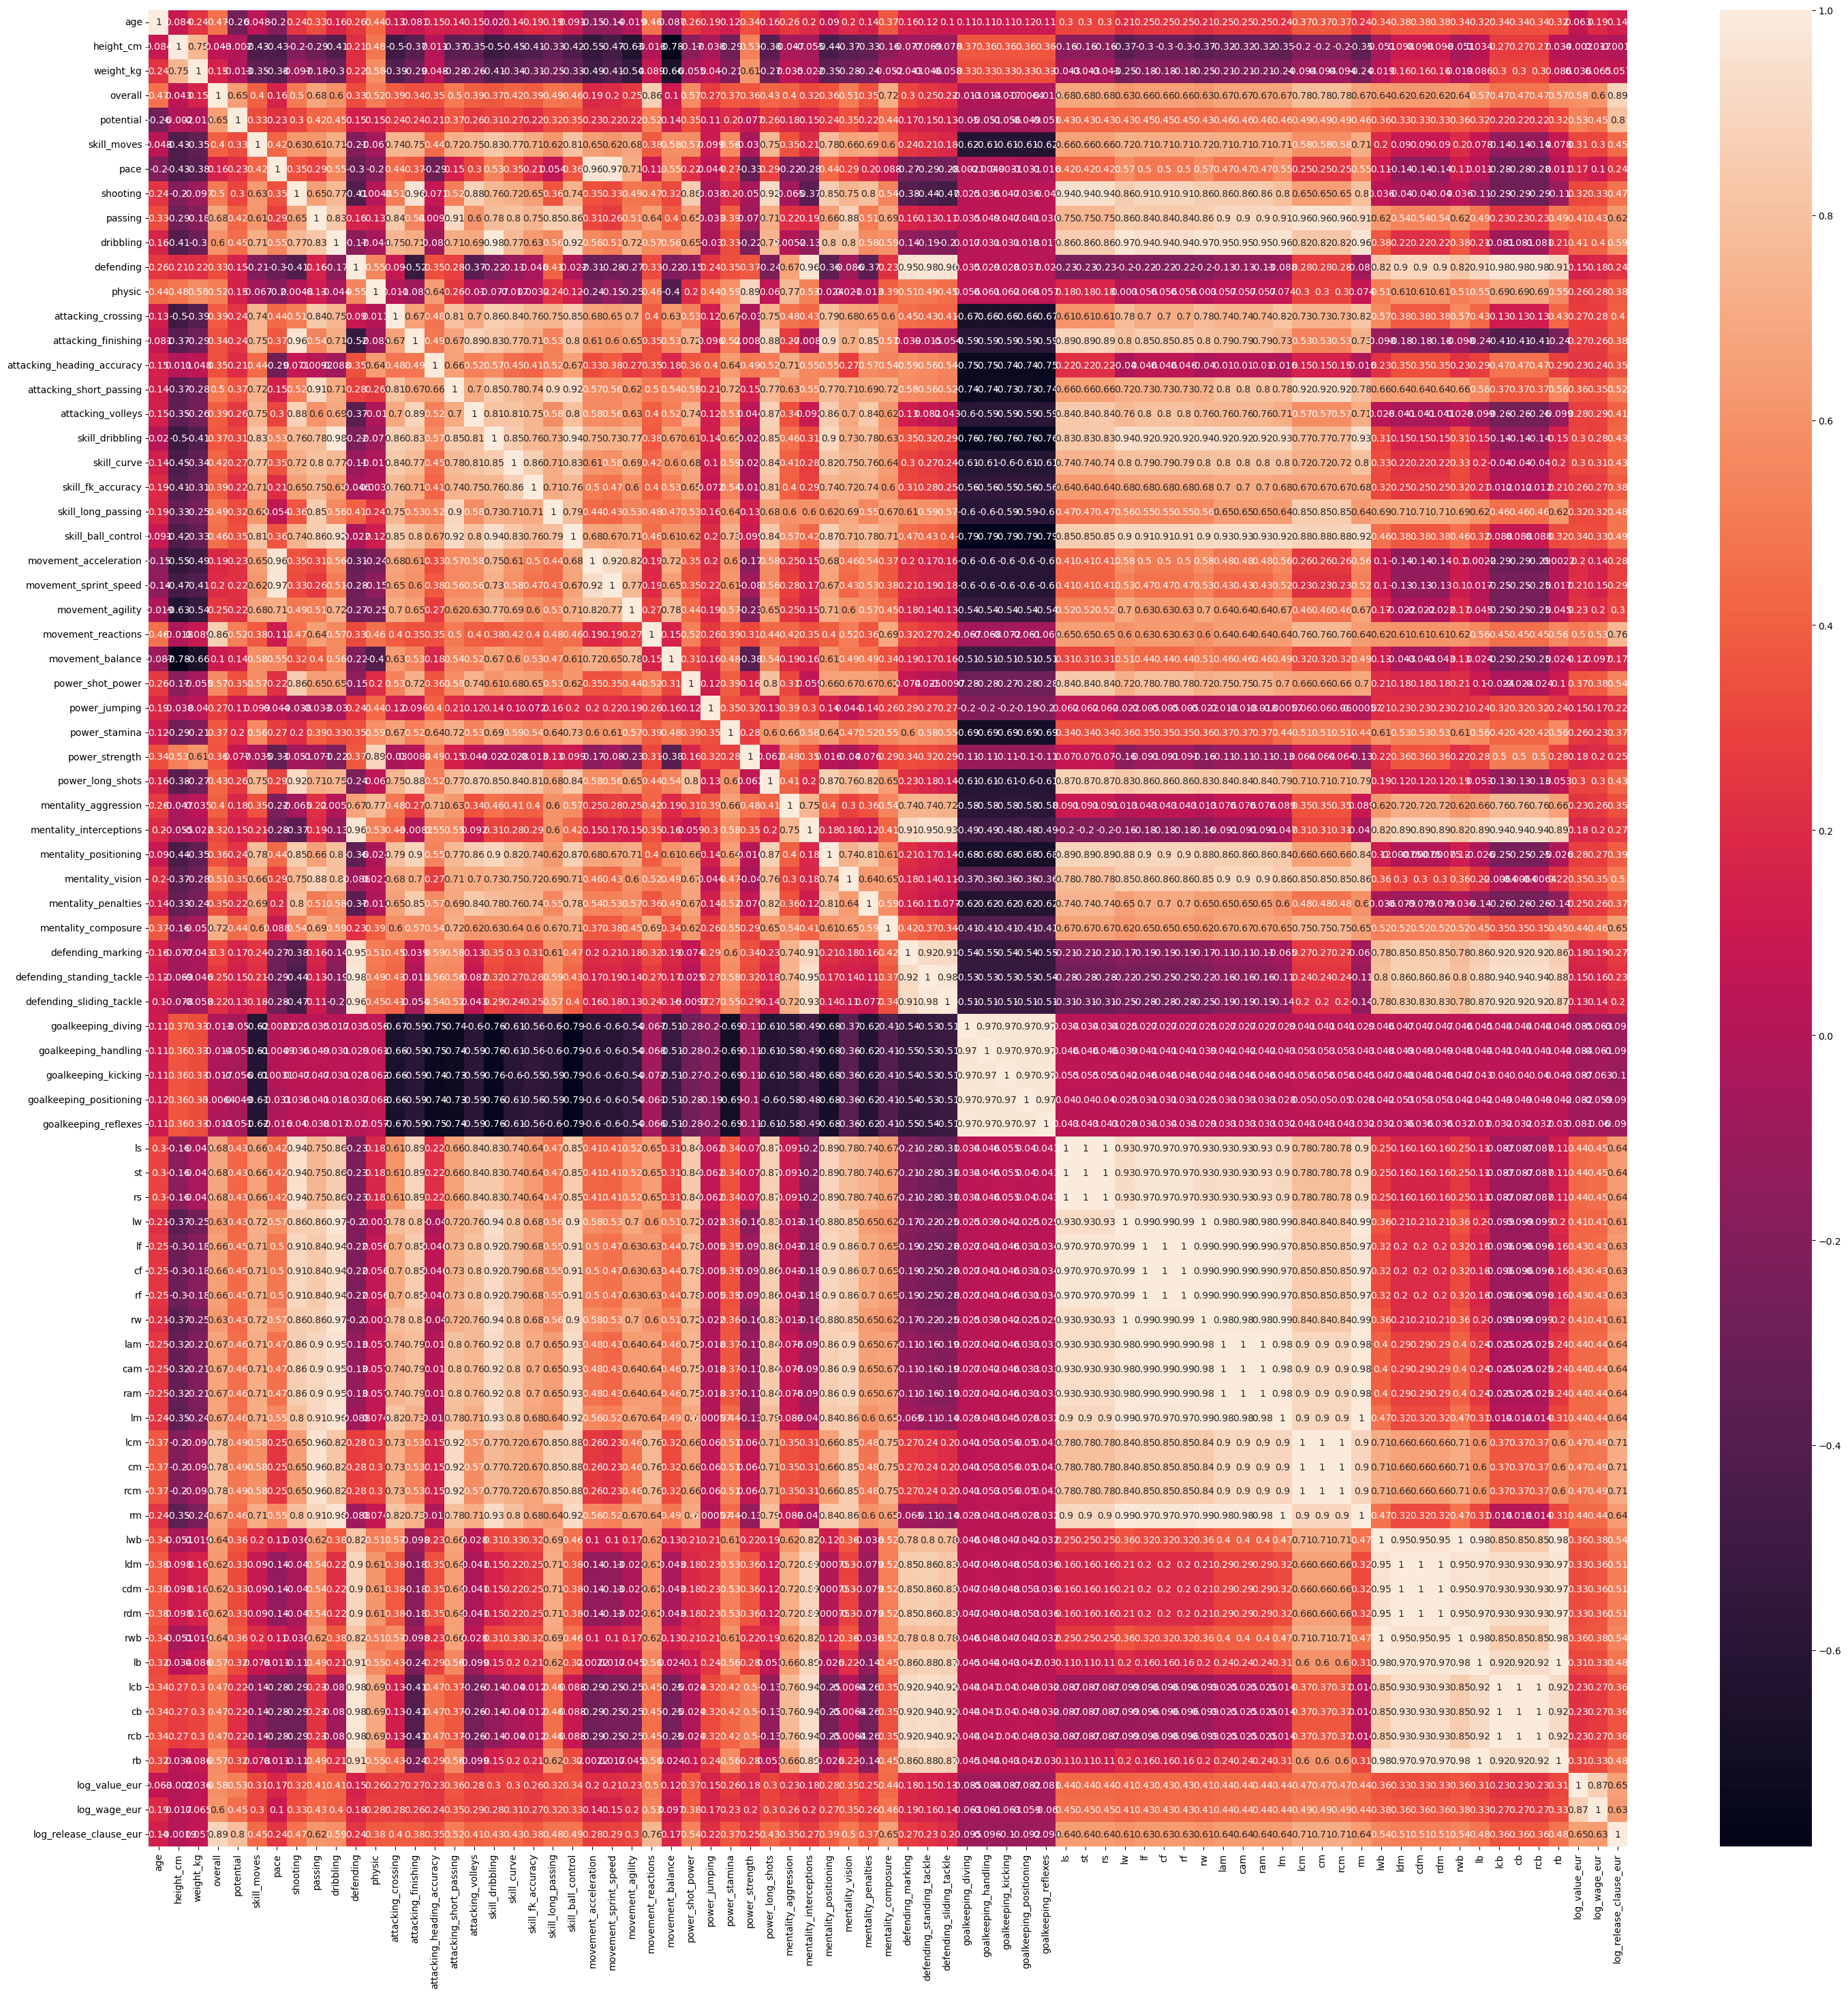

In [96]:
plt.figure(figsize=(35,35))
sns.heatmap(df[Outfield_player_columns].corr(),annot=True)

In [97]:
Position_rating_columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
                        'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [98]:
Goalkeeper_columns = []
for i in df.columns:
    if i not in Position_rating_columns:
       Goalkeeper_columns.append(i)
Goalkeeper_columns

['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkee

In [99]:
Goalkeeper_rating_columns = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']

In [100]:
Goalkeeper_df = df[Goalkeeper_columns].dropna(subset=Goalkeeper_rating_columns)

In [101]:
Goalkeeper_df.drop(['pace','shooting','passing','dribbling','defending','physic'],axis=1,inplace=True)

In [102]:
Goalkeeper_df.isnull().sum() # Now Goalkeeper dataframe is ready

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
skill_moves                   0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_lo

* Applying Robustscaler on Goalkeeper Data

In [103]:
from sklearn.preprocessing import RobustScaler
Goalkeeper_scaler = RobustScaler()
Scaled_Goalkeeper_Data = Goalkeeper_scaler.fit_transform(Goalkeeper_df)
Scaled_Goalkeeper_Data

array([[ 0.        ,  0.        ,  0.71428571, ...,  2.7136213 ,
         2.57029467,  3.14974712],
       [ 0.125     , -0.16666667,  0.42857143, ...,  2.64243873,
         3.00118279,  3.06833176],
       [ 0.        ,  0.5       ,  1.28571429, ...,  2.56428259,
         2.70401635,  2.9214647 ],
       ...,
       [-0.875     , -1.        , -0.57142857, ..., -1.07143235,
        -0.43058002, -1.10230416],
       [-1.125     , -0.5       , -1.57142857, ..., -1.07143235,
        -0.43058002, -1.24094387],
       [-0.75      ,  0.        ,  0.28571429, ..., -1.18640546,
        -0.43058002, -1.41425104]])

**Model Building** & **Model Selection**
* Cluster 0 (Outfielders): high pace, shooting, dribbling,high passing, vision, ball control,high defending, strength, interceptions
* Cluster 1 (Goalkeepers): specialized GK attributes

In [104]:
from sklearn.cluster import KMeans, AgglomerativeClustering

* Elbow Technique for Outfield players

In [105]:
wcss = []        
for i in range(1,11):
    Outfield_player_model = KMeans(n_clusters=i)
    Outfield_player_model.fit(Scaled_Outfield_players)
    Outfield_player_model.inertia_    
    wcss.append(Outfield_player_model.inertia_)

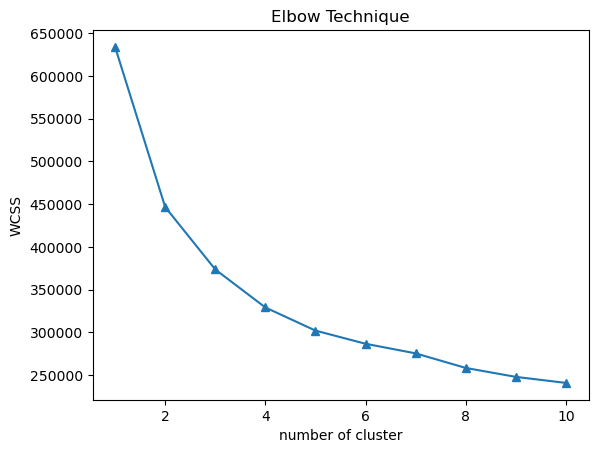

In [106]:
plt.plot(range(1,11),wcss, marker = "^")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.title("Elbow Technique")
plt.show()

In [107]:
# help of Elbow technique we find best centroid.
Outfield_player_model = KMeans(n_clusters=3,random_state=42)
Outfield_player_model.fit(Outfield_player_df)

KMeans(n_clusters=3, random_state=42)

**Evaluation Matrics**

In [108]:
Outfield_player_label=Outfield_player_model.labels_
Outfield_player_label

from sklearn.metrics import silhouette_score
score_for_outfiled_players=silhouette_score(Outfield_player_df,Outfield_player_label)
score_for_outfiled_players

0.28016089779052233

* Elbow Technique for Goalkeeper

In [109]:
WCSS = []        
for i in range(1,11):
    Goalkeeper_model = KMeans(n_clusters=i)
    Goalkeeper_model.fit(Scaled_Goalkeeper_Data)
    Goalkeeper_model.inertia_    
    WCSS.append(Goalkeeper_model.inertia_)

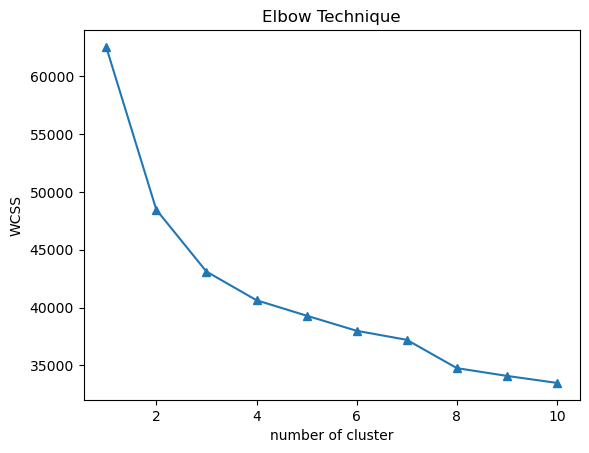

In [110]:
plt.plot(range(1,11),WCSS, marker = "^")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.title("Elbow Technique")
plt.show()

In [111]:
Goalkeeper_model = KMeans(n_clusters=3,random_state=42)
Goalkeeper_model.fit(Goalkeeper_df)

KMeans(n_clusters=3, random_state=42)

**Evaluation Matrics**

In [112]:
Goalkeeper_label=Goalkeeper_model.labels_
Goalkeeper_label

from sklearn.metrics import silhouette_score
score_for_Goalkeepers=silhouette_score(Goalkeeper_df,Goalkeeper_label)
score_for_Goalkeepers

0.1604624511723739

#### Hyperparameter tuning of cluster 0 : Outfield players

In [113]:
best_outfield_Score = -1
best_outfield_params = {}

for k in range(2, 10):
    for init_method in ['k-means++', 'random']:
        kmeans = KMeans(
            n_clusters=k,
            init=init_method,
            n_init=30,
            max_iter=500,
            random_state=42
        )
        Outfield_players_labels = kmeans.fit_predict(Scaled_Outfield_players)
        score = silhouette_score(Scaled_Outfield_players,Outfield_players_labels)
        print(f"[Outfield] k={k}, init={init_method}, silhouette={score:.4f}")

        if score > best_outfield_Score:
            best_outfield_Score = score
            best_outfield_params = {'k': k, 'init': init_method}

print("\n Best Outfield Parameters:")
print(best_outfield_params)
print("Best Outfield player silhouette:",best_outfield_Score)

[Outfield] k=2, init=k-means++, silhouette=0.2451
[Outfield] k=2, init=random, silhouette=0.2451
[Outfield] k=3, init=k-means++, silhouette=0.2144
[Outfield] k=3, init=random, silhouette=0.2144
[Outfield] k=4, init=k-means++, silhouette=0.1944
[Outfield] k=4, init=random, silhouette=0.1944
[Outfield] k=5, init=k-means++, silhouette=0.1831
[Outfield] k=5, init=random, silhouette=0.1831
[Outfield] k=6, init=k-means++, silhouette=0.1556
[Outfield] k=6, init=random, silhouette=0.1556
[Outfield] k=7, init=k-means++, silhouette=0.1562
[Outfield] k=7, init=random, silhouette=0.1562
[Outfield] k=8, init=k-means++, silhouette=0.1523
[Outfield] k=8, init=random, silhouette=0.1523
[Outfield] k=9, init=k-means++, silhouette=0.1534
[Outfield] k=9, init=random, silhouette=0.1533

 Best Outfield Parameters:
{'k': 2, 'init': 'k-means++'}
Best Outfield player silhouette: 0.24513142337418672


In [114]:
# After hyperparameter tuning
Outfield_player_model = KMeans(n_clusters=3,init='k-means++',random_state=42)
Outfield_player_model.fit(Outfield_player_df)
Outfield_player_label=Outfield_player_model.labels_
Outfield_player_label

from sklearn.metrics import silhouette_score
Final_score_for_outfiled_players=silhouette_score(Outfield_player_df,Outfield_player_label)
Final_score_for_outfiled_players

0.28016089779052233

#### Hyperparameter tuning of cluster 1: Goalkeeper

In [115]:
best_Goalkeeper_Score = -1
best_Goalkeeper_params = {}

for k in range(2, 10):
    for init_method in ['k-means++', 'random']:
        kmeans = KMeans(
            n_clusters=k,
            init=init_method,
            n_init=30,
            max_iter=500,
            random_state=42
        )
        Goalkeeper_labels = kmeans.fit_predict(Scaled_Goalkeeper_Data)
        score = silhouette_score(Scaled_Goalkeeper_Data,Goalkeeper_labels)
        print(f"[Goalkeeper] k={k}, init={init_method}, silhouette={score:.4f}")

        if score > best_Goalkeeper_Score:
            best_Goalkeeper_Score = score
            best_Goalkeeper_params = {'k': k, 'init': init_method}

print("\n Best Goalkeeper Parameters:")
print(best_Goalkeeper_params)
print("Best Goalkeeper silhouette:",best_Goalkeeper_Score)

[Goalkeeper] k=2, init=k-means++, silhouette=0.1966
[Goalkeeper] k=2, init=random, silhouette=0.1967
[Goalkeeper] k=3, init=k-means++, silhouette=0.1589
[Goalkeeper] k=3, init=random, silhouette=0.1589
[Goalkeeper] k=4, init=k-means++, silhouette=0.1652
[Goalkeeper] k=4, init=random, silhouette=0.1652
[Goalkeeper] k=5, init=k-means++, silhouette=0.1368
[Goalkeeper] k=5, init=random, silhouette=0.1367
[Goalkeeper] k=6, init=k-means++, silhouette=0.0977
[Goalkeeper] k=6, init=random, silhouette=0.0998
[Goalkeeper] k=7, init=k-means++, silhouette=0.1067
[Goalkeeper] k=7, init=random, silhouette=0.1100
[Goalkeeper] k=8, init=k-means++, silhouette=0.0977
[Goalkeeper] k=8, init=random, silhouette=0.0975
[Goalkeeper] k=9, init=k-means++, silhouette=0.0952
[Goalkeeper] k=9, init=random, silhouette=0.0925

 Best Goalkeeper Parameters:
{'k': 2, 'init': 'random'}
Best Goalkeeper silhouette: 0.1967097910654254


In [116]:
# After hyperparameter tuning
Goalkeeper_model = KMeans(n_clusters=2,init='random',random_state=42)
Goalkeeper_model.fit(Goalkeeper_df)
Goalkeeper_label=Goalkeeper_model.labels_
Goalkeeper_label

from sklearn.metrics import silhouette_score
Final_score_for_Goalkeepers=silhouette_score(Goalkeeper_df,Goalkeeper_label)
Final_score_for_Goalkeepers

0.2297683303763892

### Conclusion

1. Top 10 countries with most players

In [117]:
display(Top_countries_count.to_frame().rename(columns={'nationality': 'Player_Count'}))

count
nationality       
England       1667
Germany       1216
Spain         1035
France         984
Argentina      886
Brazil         824
Italy          732
Colombia       591
Japan          453
Netherlands    416

2. silhouette_score for Outfield players and Goalkeepers

In [118]:
silhouette_df = pd.DataFrame({
    "Player_Type": ["Outfield Players", "Goalkeepers"],
    "n_clusters": [3, 2],
    "Silhouette_Score": [Final_score_for_outfiled_players, Final_score_for_Goalkeepers]
})

display(silhouette_df.style.set_caption("Silhouette Score Comparison (Outfield vs Goalkeeper)"))